In [1]:
#importing necessary libraries for the data manipulation and analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

#code for installing new libraries within the jupyter notebbok
"""import sys
!{sys.executable} -m pip install lmfit
"""
import lmfit
from lmfit.models import PolynomialModel,ExponentialModel,PowerLawModel,StepModel

In [2]:
#import the Excel spreadsheet containing the various output for CGR 1000
cgr1000 = pd.ExcelFile('Data_CGR1000.xlsx')
df_p = pd.read_excel(cgr1000, 'pressure')
df_rhol = pd.read_excel(cgr1000, 'liquid density')
df_rhog = pd.read_excel(cgr1000, 'gas density')
df_mul = pd.read_excel(cgr1000, 'liquid viscosity')
df_mug = pd.read_excel(cgr1000, 'gas viscosity')
df_ul = pd.read_excel(cgr1000, 'liquid superficial velocity')
df_ug = pd.read_excel(cgr1000, 'gas superficial velocity')


## Exploratory Data Analysis 

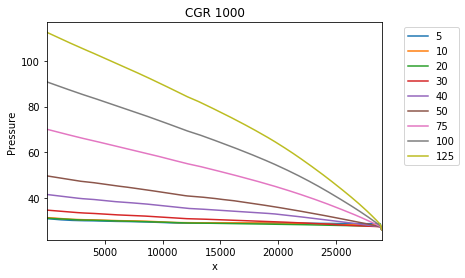

In [3]:
#Pressure across the pipeline for different gas rates
ax=df_p.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
ax.set_ylabel("Pressure")
ax.set_title('CGR 1000');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');



### Liquid phase exploration 

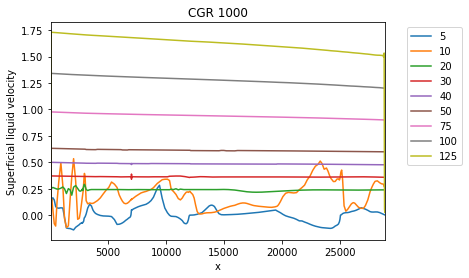

In [4]:
#liquid velocity across the pipeline for different gas rates
ax=df_ul.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
ax.set_ylabel("Superficial liquid velocity");
ax.set_title('CGR 1000');



Negative velocity (vector) will cause negative mixture density and negative Reynold number (scalars).
We will convert any negative values to their absolute values.
  

In [5]:
df_ul=df_ul.abs()

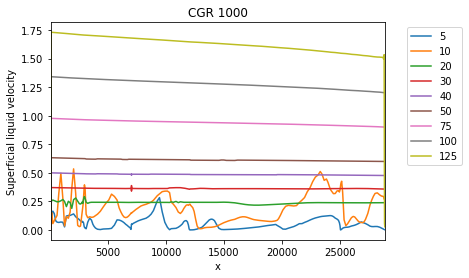

In [6]:
#liquid velocity across the pipeline for different gas rates
ax=df_ul.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
ax.set_ylabel("Superficial liquid velocity");
ax.set_title('CGR 1000');






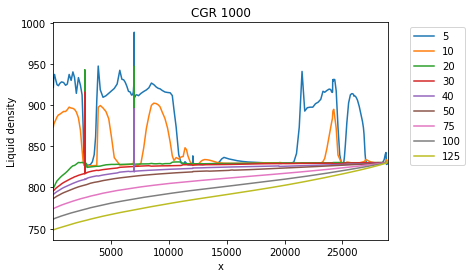

In [7]:
ax=df_rhol.plot(x='x',y=['5','10','20','30','40','50','75','100','125'], legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
ax.set_ylabel("Liquid density");
ax.set_title('CGR 1000');




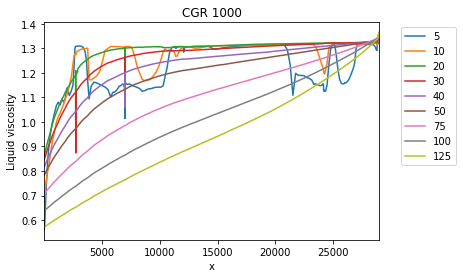

In [8]:
#liquid viscosity across the pipeline for different gas rates
ax=df_mul.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
ax.set_title('CGR 1000')
ax.set_ylabel("Liquid viscosity");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');



At low inlet gas rates there's a high fluctuatioin in liquid velocity, density, and viscosity


### Gas phase exploration

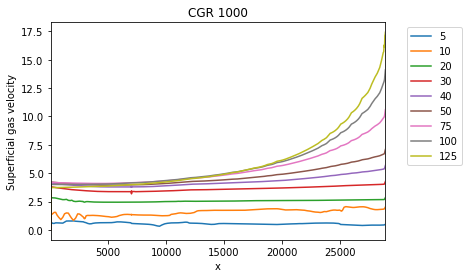

In [9]:
#gas velocity across the pipeline for different gas rates
ax=df_ug.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
ax.set_title('CGR 1000')
ax.set_ylabel("Superficial gas velocity");



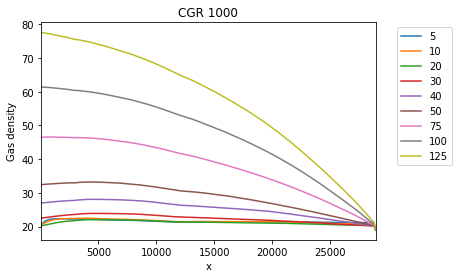

In [10]:
#gas density across the pipeline for different gas rates
ax=df_rhog.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
ax.set_title('CGR 1000')
ax.set_ylabel("Gas density");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

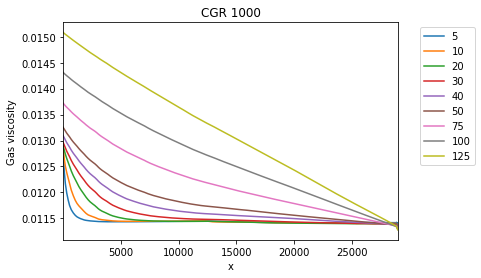

In [11]:
#gas viscosity across the pipeline for different gas rates
ax=df_mug.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
ax.set_title('CGR 1000')
ax.set_ylabel("Gas viscosity");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

### Mixture phase exploration

In [12]:
#create u_mixture dataframe
df_um=df_ul.iloc[:,1:]+df_ug.iloc[:,1:]
df_um.insert(0, 'x', df_p['x'])

#create rho_mixture dataframe
df_rhom=df_rhol.iloc[:,1:]*df_ul.iloc[:,1:]+df_rhog.iloc[:,1:]*df_ug.iloc[:,1:]
df_rhom.insert(0, 'x', df_p['x'])

#create mu_mixture dataframe
df_mum=df_mul.iloc[:,1:]*df_ul.iloc[:,1:]+df_mug.iloc[:,1:]*df_ug.iloc[:,1:]
df_mum.insert(0, 'x', df_p['x'])

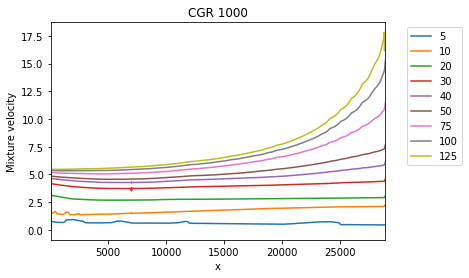

In [13]:
#mixture velocity across the pipeline for different gas rates
ax=df_um.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
ax.set_title('CGR 1000')
ax.set_ylabel("Mixture velocity");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

Follows predominantly the gas velocity trend given that that's much larger in magnitude than the liquid velocity 

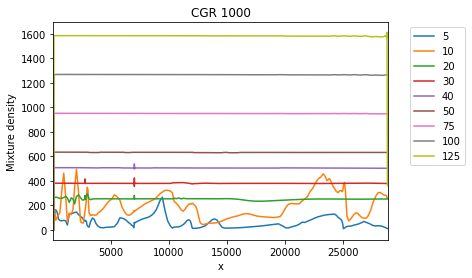

In [14]:
#mixture density across the pipeline for different gas rates
ax= df_rhom.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
ax.set_title('CGR 1000')
ax.set_ylabel("Mixture density");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

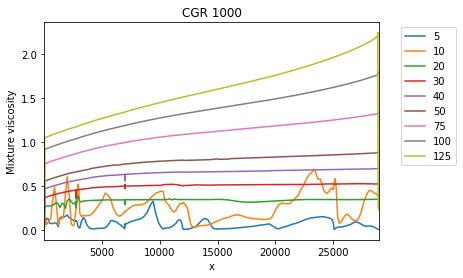

In [15]:
#mixture viscosity across the pipeline for different gas rates
ax=df_mum.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
ax.set_title('CGR 1000')
ax.set_ylabel("Mixture viscosity");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

The spikes originate from the fluctuation in liquid phase density

In [16]:
#Create Reynolds and Froude dataframes

#Froude number dataframe 
df_froude=df_um.iloc[:,1:]*((df_rhol.iloc[:,1:]/(df_rhol.iloc[:,1:]-df_rhog.iloc[:,1:])).apply(np.sqrt))*df_um.iloc[:,1:]/(np.sqrt(9.81*0.324))
df_froude.insert(0, 'x', df_p['x'])
#drop first row of Froude dataframe as it contains all zeros and that will affect the regression later
df_froude.drop(df_froude.index[0], inplace=True)
df_froude.reset_index(inplace=True,drop=True)
#Reynolds number dataframe 
df_reynolds=(df_um.iloc[:,1:]*df_rhom.iloc[:,1:]*0.324)/(0.001*df_mum.iloc[:,1:])
df_reynolds.insert(0, 'x', df_p['x'])
df_reynolds.dropna(inplace=True)#drop null values caused by division with zero
df_reynolds.reset_index(inplace=True,drop=True) # reset index of the dataframe

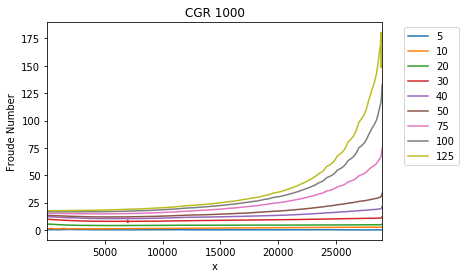

In [17]:
ax=df_froude.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
ax.set_title('CGR 1000')
ax.set_ylabel("Froude Number");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

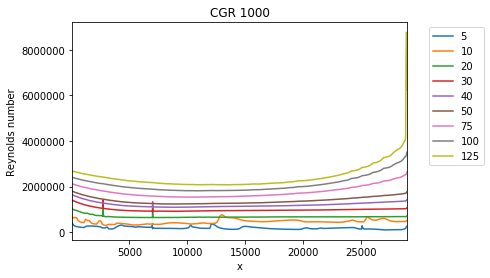

In [18]:
ax=df_reynolds.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
ax.set_title('CGR 1000')
ax.set_ylabel("Reynolds number");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

The jumps at the end of the pipeline  were caused by sudden drops in various quantities at the denominator of the Reynolds number. We'll go ahead and drop those rows

In [19]:
df_reynolds.tail(10) # return the last 10 rows to spot the outliers

x              5             10             20            30  \
260  28706.895134  139430.127976  472043.508067  687123.397202  1.030953e+06   
261  28766.009025  153864.018432  474703.477188  687358.216649  1.030377e+06   
262  28806.058552  162707.147745  478718.496540  687731.016571  1.030784e+06   
263  28842.490456  169216.603579  474410.804357  683770.688777  1.027627e+06   
264  28877.004692  199965.954758  477835.589065  687367.852834  1.032036e+06   
265  28904.843980  250712.035772  486834.579075  696795.545568  1.044491e+06   
266  28924.500671  262424.954462  494623.418871  704853.421222  1.055054e+06   
267  28937.099391  264954.588705  500386.115203  710774.256863  1.062824e+06   
268  28944.677299  265111.832424  505752.639994  716246.557488  1.069350e+06   
269  28949.677299  265118.669882  507303.393266  717918.191233  1.071854e+06   

               40            50            75           100           125  
260  1.367104e+06  1.696411e+06  2.489285e+06  3.247203e+06  3.954831e+06  
261  1.370316e+06  1.702810e+06  2.509387e+06  3.287225e+06  4.009542e+06  
262  1.372331e+06  1.706816e+06  2.521971e+06  3.312397e+06  4.019336e+06  
263  1.369445e+06  1.704354e+06  2.522712e+06  3.318746e+06  4.151893e+06  
264  1.374712e+06  1.710758e+06  2.533576e+06  3.335347e+06  7.513477e+06  
265  1.390883e+06  1.731475e+06  2.568916e+06  3.391884e+06  8.763717e+06  
266  1.404459e+06  1.748695e+06  2.597282e+06  3.435443e+06  8.728378e+06  
267  1.414466e+06  1.761416e+06  2.618333e+06  3.467954e+06  8.703935e+06  
268  1.422177e+06  1.770618e+06  2.633510e+06  3.491356e+06  8.732659e+06  
269  1.425716e+06  1.775182e+06  2.642177e+06  3.506361e+06  6.239156e+06

In [20]:
#drop the last six rows which contain the outliers
df_reynolds.drop(df_reynolds.tail(6).index,inplace=True) # drop last n rows

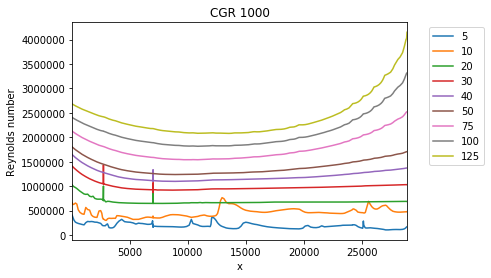

In [21]:
ax=df_reynolds.plot(x='x',y=['5','10','20','30','40','50','75','100','125'])
ax.set_title('CGR 1000')
ax.set_ylabel("Reynolds number");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

## Investigating the relation between Reynolds number and Inlet gas rate

Text(0.5, 1.0, 'CGR 1000')

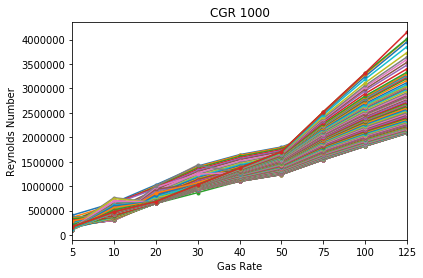

In [22]:
ax=df_reynolds.T.iloc[1:,:].plot(use_index=True, legend=False,style='.-')
plt.xlabel('Gas Rate')
plt.ylabel('Reynolds Number')
ax.set_title('CGR 1000')

Each line in the above diagram represents a location `x` along the pipeline. The legend was omitted due to its size. From this diagram we can see an overall net positive increase of the Reynolds number with the increase of inlet gas rate. In the next section, we will take some of these curves, plot them individually, and fit functions on them to assess which function fits best overall.

## Investigating the relation between Froude number and Inlet gas rate

Text(0.5, 1.0, 'CGR 1000')

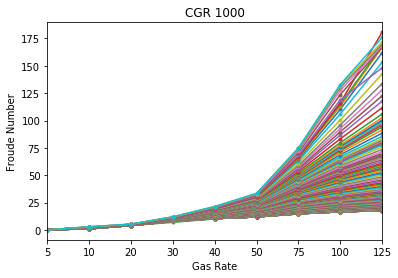

In [23]:
ax= df_froude.T.iloc[1:,:].plot(use_index=True, legend=False,style='.-')
plt.xlabel('Gas Rate')
plt.ylabel('Froude Number')
ax.set_title('CGR 1000')

Each line in the above diagram represents a location `x` along the pipeline. The legend was omitted due to its size. From this diagram we can see an overall positive increase of the Froude number with the increase of inlet gas rate. For  Gas rates > 50 MMscf/d, we see a dramatic increase in the Froude number.

## Finding a regression function

Below, we perform regression using the following functions:

The function `fit_model` performs the regression and plots the output through the input of the following parameters: 

* `model`- Name of the model:
    * `ExponentialModel()` to fit an exponential model
    * `PolynomialModel()` to fit a polynomial model
    * `PowerLawModel()` to fit a powerlaw model
    * `StepModel(form='logistic')` to fit a logistic model
    * `log_fit` to fit a logarithmic model

* `nrow`,`ncol` refer to the subplot structure, i.e. how many rows and columns of subplots to create.
* `df` the dataframe of the response/dependent variable (e.g. Reynolds number)
* `xx` the range of explanatory/independent variable (e.g. gas rate) 
* `ylabel` the label for y axis label which should be the name of the response variable; used for plotting
* `step` the sampling step of the original dataset.  

To fit logarithmic models, the `scipy` library is used. The custom function is `fit_log`, and as a `model` input it takes `log_fit` instead. 


Inside the body of both functions, the variable `params` contains the exact parameters of the fitted function. It is possible to `print(params)` to obtain the fitting parameters of the model.





In [24]:
def fit_model(model, nrow,ncol,df,xx,ylabel,step):
    axes = np.zeros(shape=(nrow,ncol)) # initialise empty axes for creating subplots 
    fig = plt.figure(figsize=(15,30)) #define figure size 
    for i, ax in enumerate(axes.flatten()):
        params = model.guess(df.T.iloc[1:,::step].iloc[:,i],x=xx) # method that is intended to give a reasonable set of starting values from a data array that closely approximates the data to be fit
        ax = fig.add_subplot(nrow,ncol,i+1) #identify the subplot to plot on
        result = model.fit(df.T.iloc[1:,::step].iloc[:,i], params,x=xx) #fit the model
        ax= result.plot_fit(ylabel=ylabel,xlabel='Gas Rate') #plot the fit on the specified axis
        ax.set_title("x= "+str(round(df.T.iloc[0:,::step].iloc[0,i],3))) #set the title to reflect the point along the pipeline for which the output was taken
    plt.tight_layout()    
    plt.show()

    print('****')
    print('Residual plots:')
    print('****')
    
    axes = np.zeros(shape=(nrow,ncol))
    fig = plt.figure(figsize=(15,30))
    sse= 0#sum of squared error
    for i, ax in enumerate(axes.flatten()):
        params = model.guess(df.T.iloc[1:,::step].iloc[:,i],x=xx)
        ax = fig.add_subplot(nrow,ncol,i+1)
        result = model.fit(df.T.iloc[1:,::step].iloc[:,i], params,x=xx)
        ax= result.plot_residuals()#plot the residuals
        ax.set_title("x= "+str(round(df.T.iloc[0:,::step].iloc[0,i],3)))
        sse+=result.residual*result.residual#calculate the sum of squared error
    plt.tight_layout()    
    plt.show()
    
    print('SSE: ',sse.mean()) #return the average SSE  metric across all the subplots so that we can compare with other functions later

In [25]:
def log_fit(x, a,b,c): #logarithmic function fit using the Scipy library
    return a*np.log(b+x)+c

def fit_log(log_fit,nrow,ncol,df,xx,ylabel,step):
    axes = np.zeros(shape=(nrow,ncol))
    fig = plt.figure(figsize=(15,30))
    for i, ax in enumerate(axes.flatten()):
        params, params_covariance = optimize.curve_fit(log_fit, xx, df.T.iloc[1:,::step].iloc[:,i])
        ax = fig.add_subplot(nrow,ncol,i+1)
        plt.scatter(xx, df.T.iloc[1:,::step].iloc[:,i], label='Data')
        plt.plot(xx, log_fit(xx, params[0],params[1],params[2]),label='Fitted function')
        plt.legend(loc='best')
        ax.set_title("x= "+str(round(df.T.iloc[0:,::step].iloc[0,i],3)))
    plt.tight_layout()    
    plt.show()
            
    print('****')
    print('Residual plots:')
    sse=0
    axes = np.zeros(shape=(nrow,ncol))
    fig = plt.figure(figsize=(15,30))
    for i, ax in enumerate(axes.flatten()):
        params, params_covariance = optimize.curve_fit(log_fit, xx, df.T.iloc[1:,::step].iloc[:,i])
        residuals = df.T.iloc[1:,::step].iloc[:,i]- log_fit(xx, *params)
        ax = fig.add_subplot(nrow,ncol,i+1)
        plt.scatter(xx,residuals)
        plt.axhline(y=0, color='r', linestyle='-')
        ax.set_title("x= "+str(round(df.T.iloc[0:,::step].iloc[0,i],3)))
        sse+=(residuals*residuals).sum()
    plt.tight_layout()    
    plt.show()
    print('SSE: ',sse.mean()) #return the average SSE  metric across all the subplots so that we can compare with other functions later

In [26]:
x=[5,10,20,30,40,50,75,100,125] # xaxis (gas rate) datapoints used for regression

# Reynolds number regression

### Polynomial fitting

#### Degree 1 (linear)

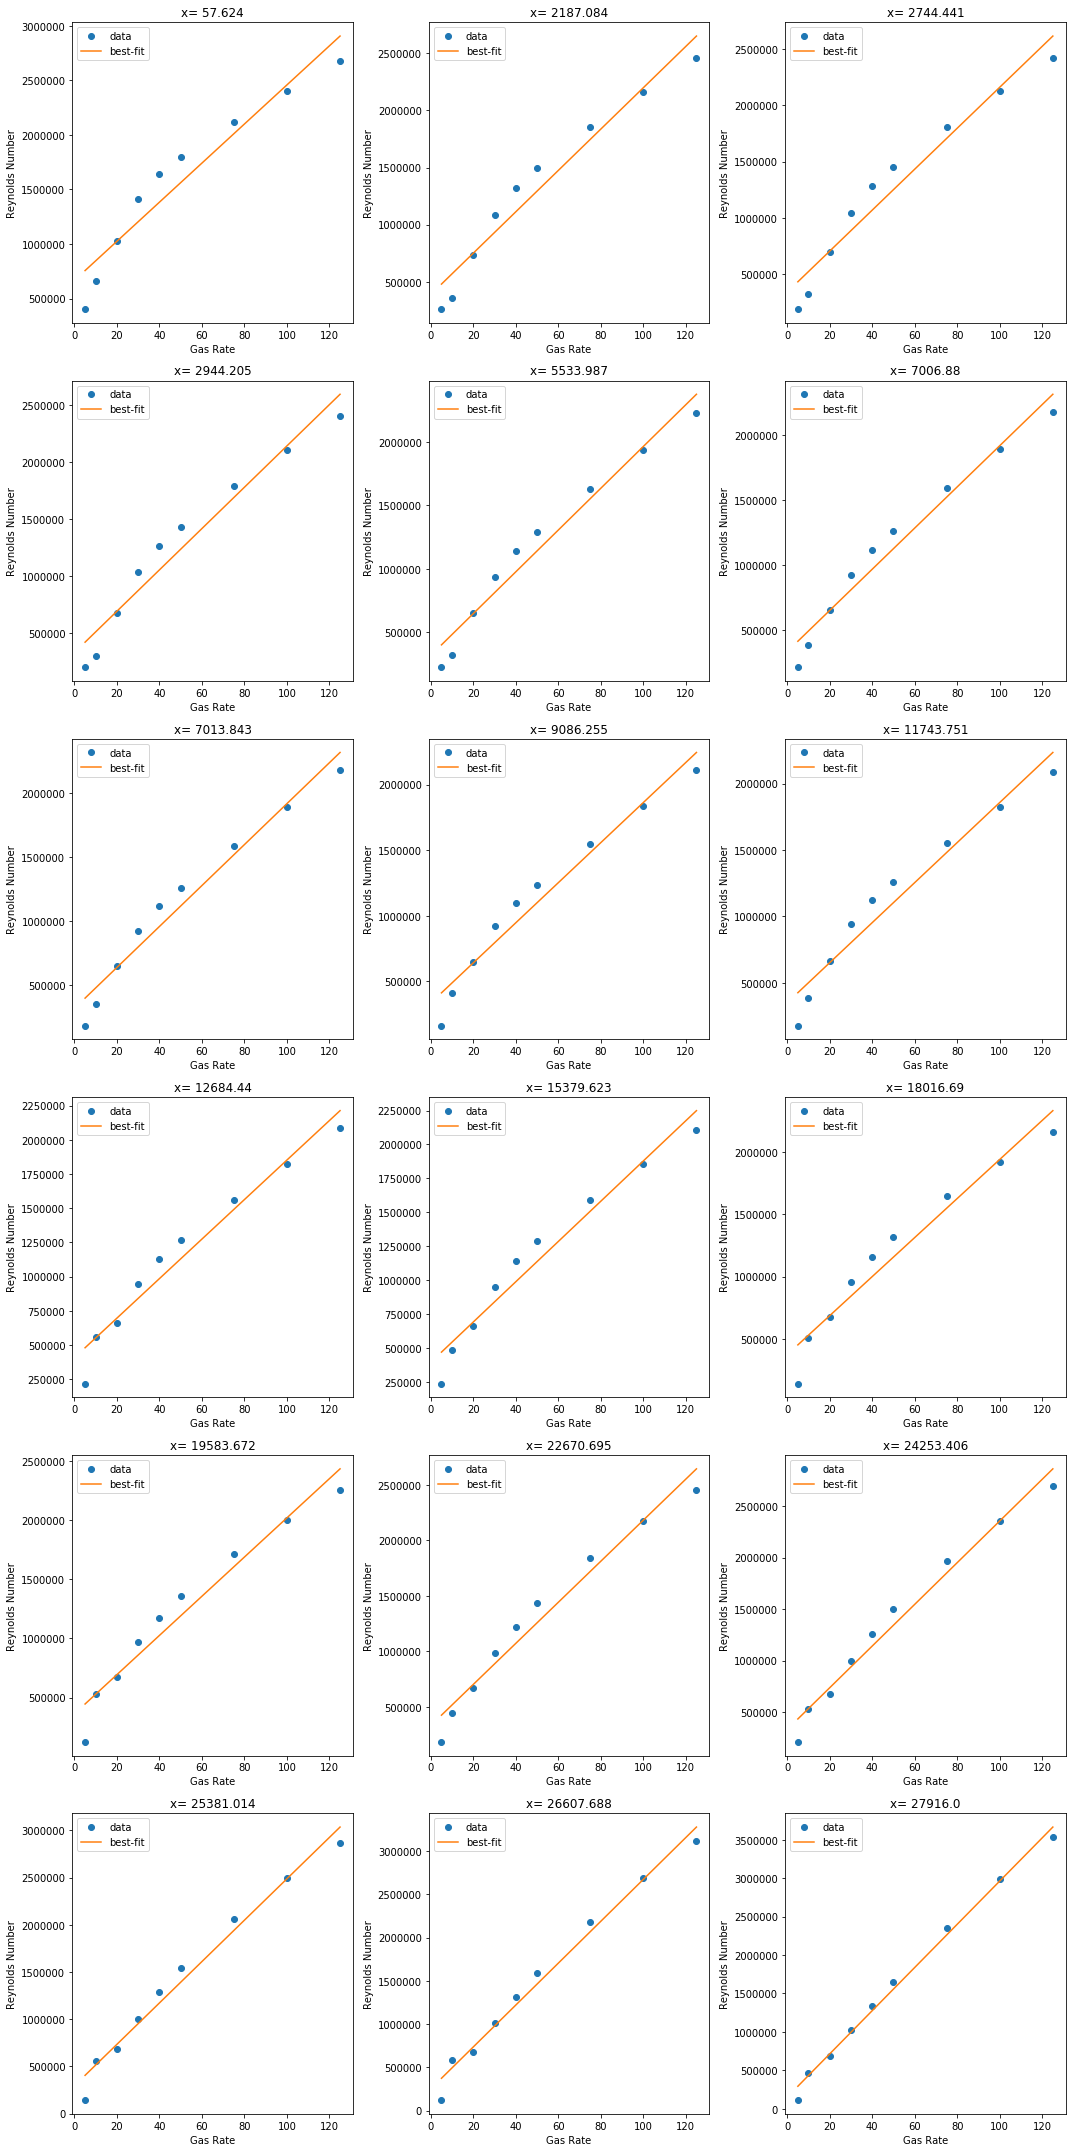

****
Residual plots:
****


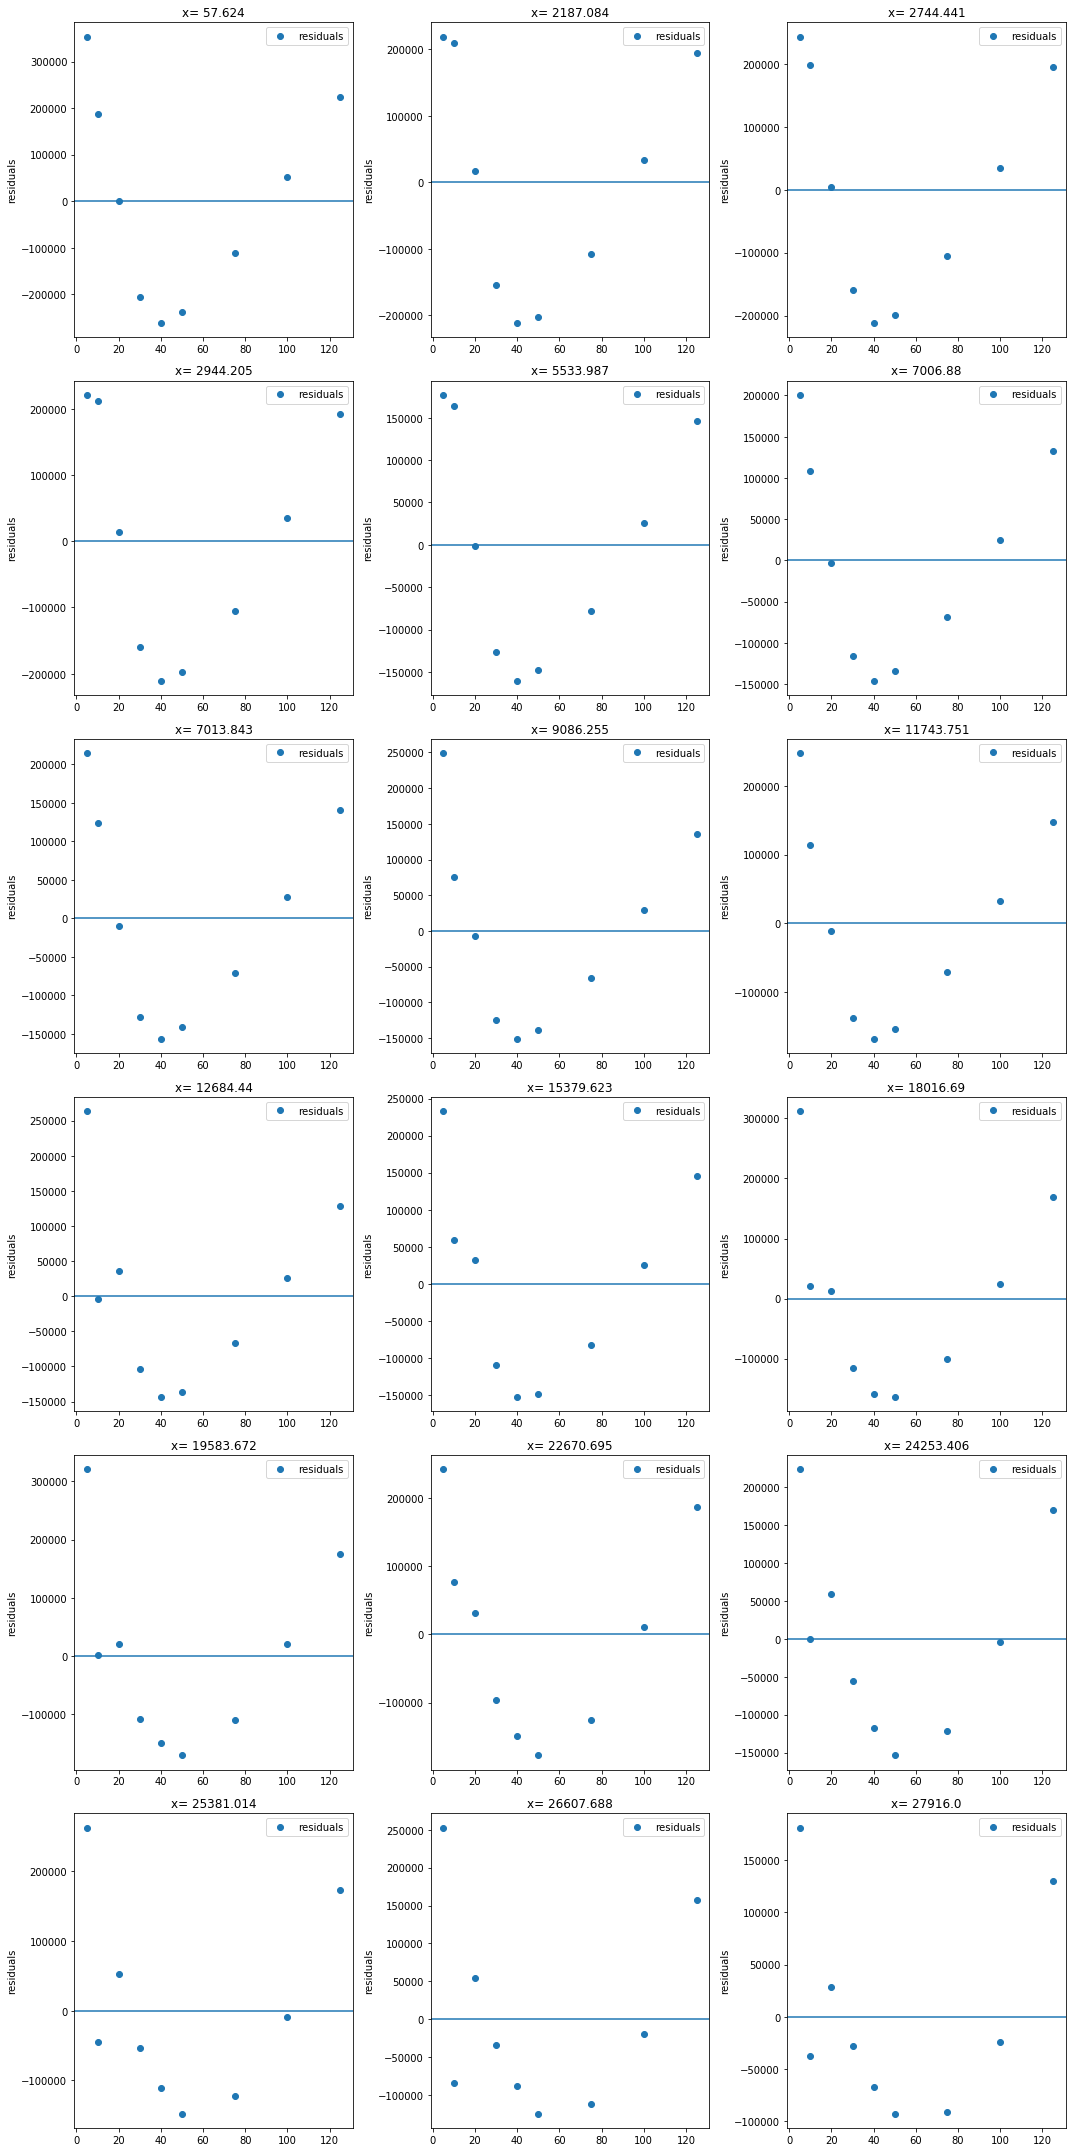

SSE:  364905012558.81415


In [27]:
fit_model(PolynomialModel(degree=1),6,3,df_reynolds,x,'Reynolds Number',15)

As we can see from these plots the residuals are not randomly dispersed. Instead they seem to follow a u-shaped pattern.
This pattern suggests that our linear model may not be appropriate because the model predictions will be too low for values in the middle of the range of the explanatory variable and too high towards the two ends of the range of the explanatory variable. A model with a curvilinear form may be more appropriate.

#### Degree 2 (quadratic)

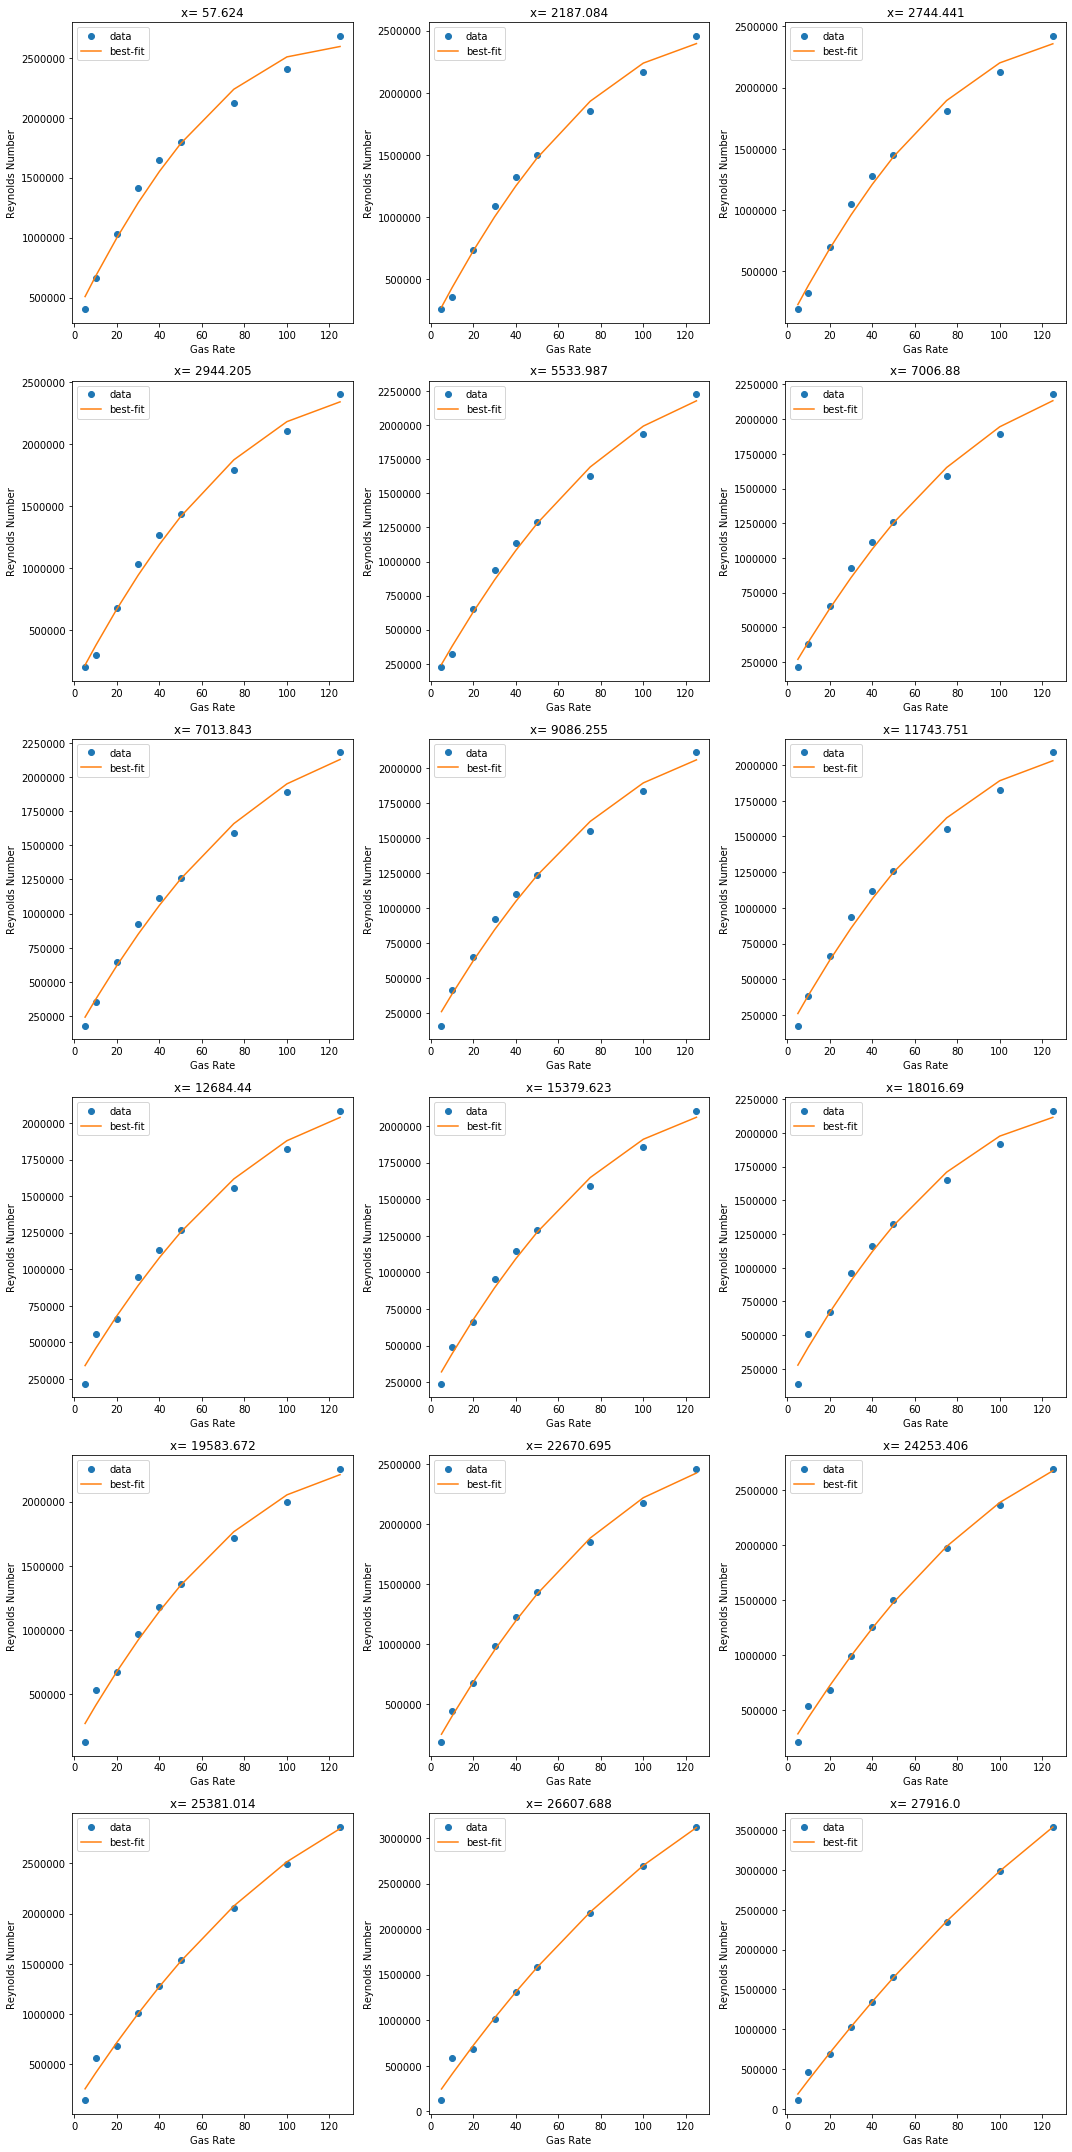

****
Residual plots:
****


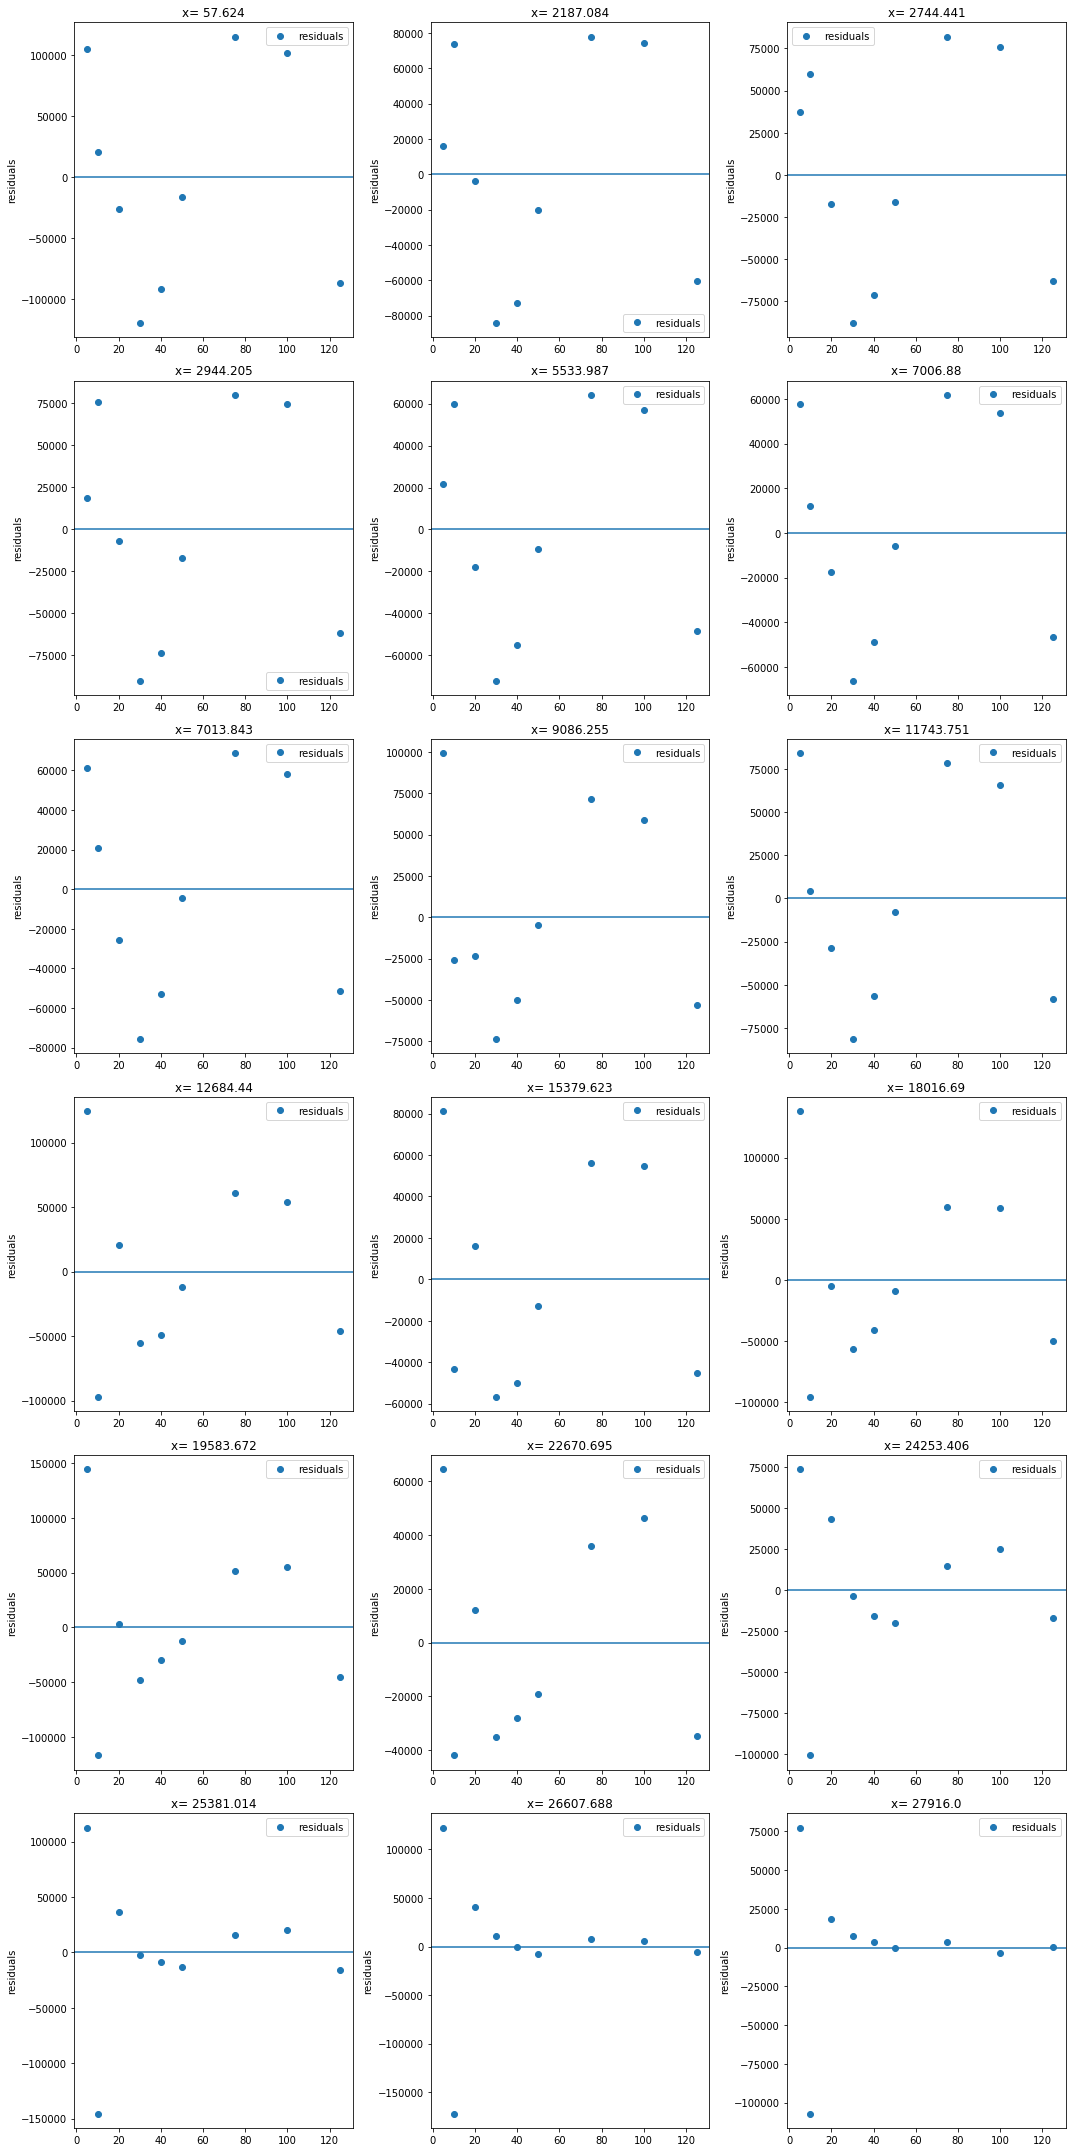

SSE:  64635632115.009926


In [28]:
fit_model(PolynomialModel(degree=2),6,3,df_reynolds,x,'Reynolds Number',15)

The pattern in the residual plot is more randomised for the quadratic fit.

Perhaps a higher order polynomial fit provides an even more randomised pattern in the residual plot? We'll try a 4th degree polynomial 

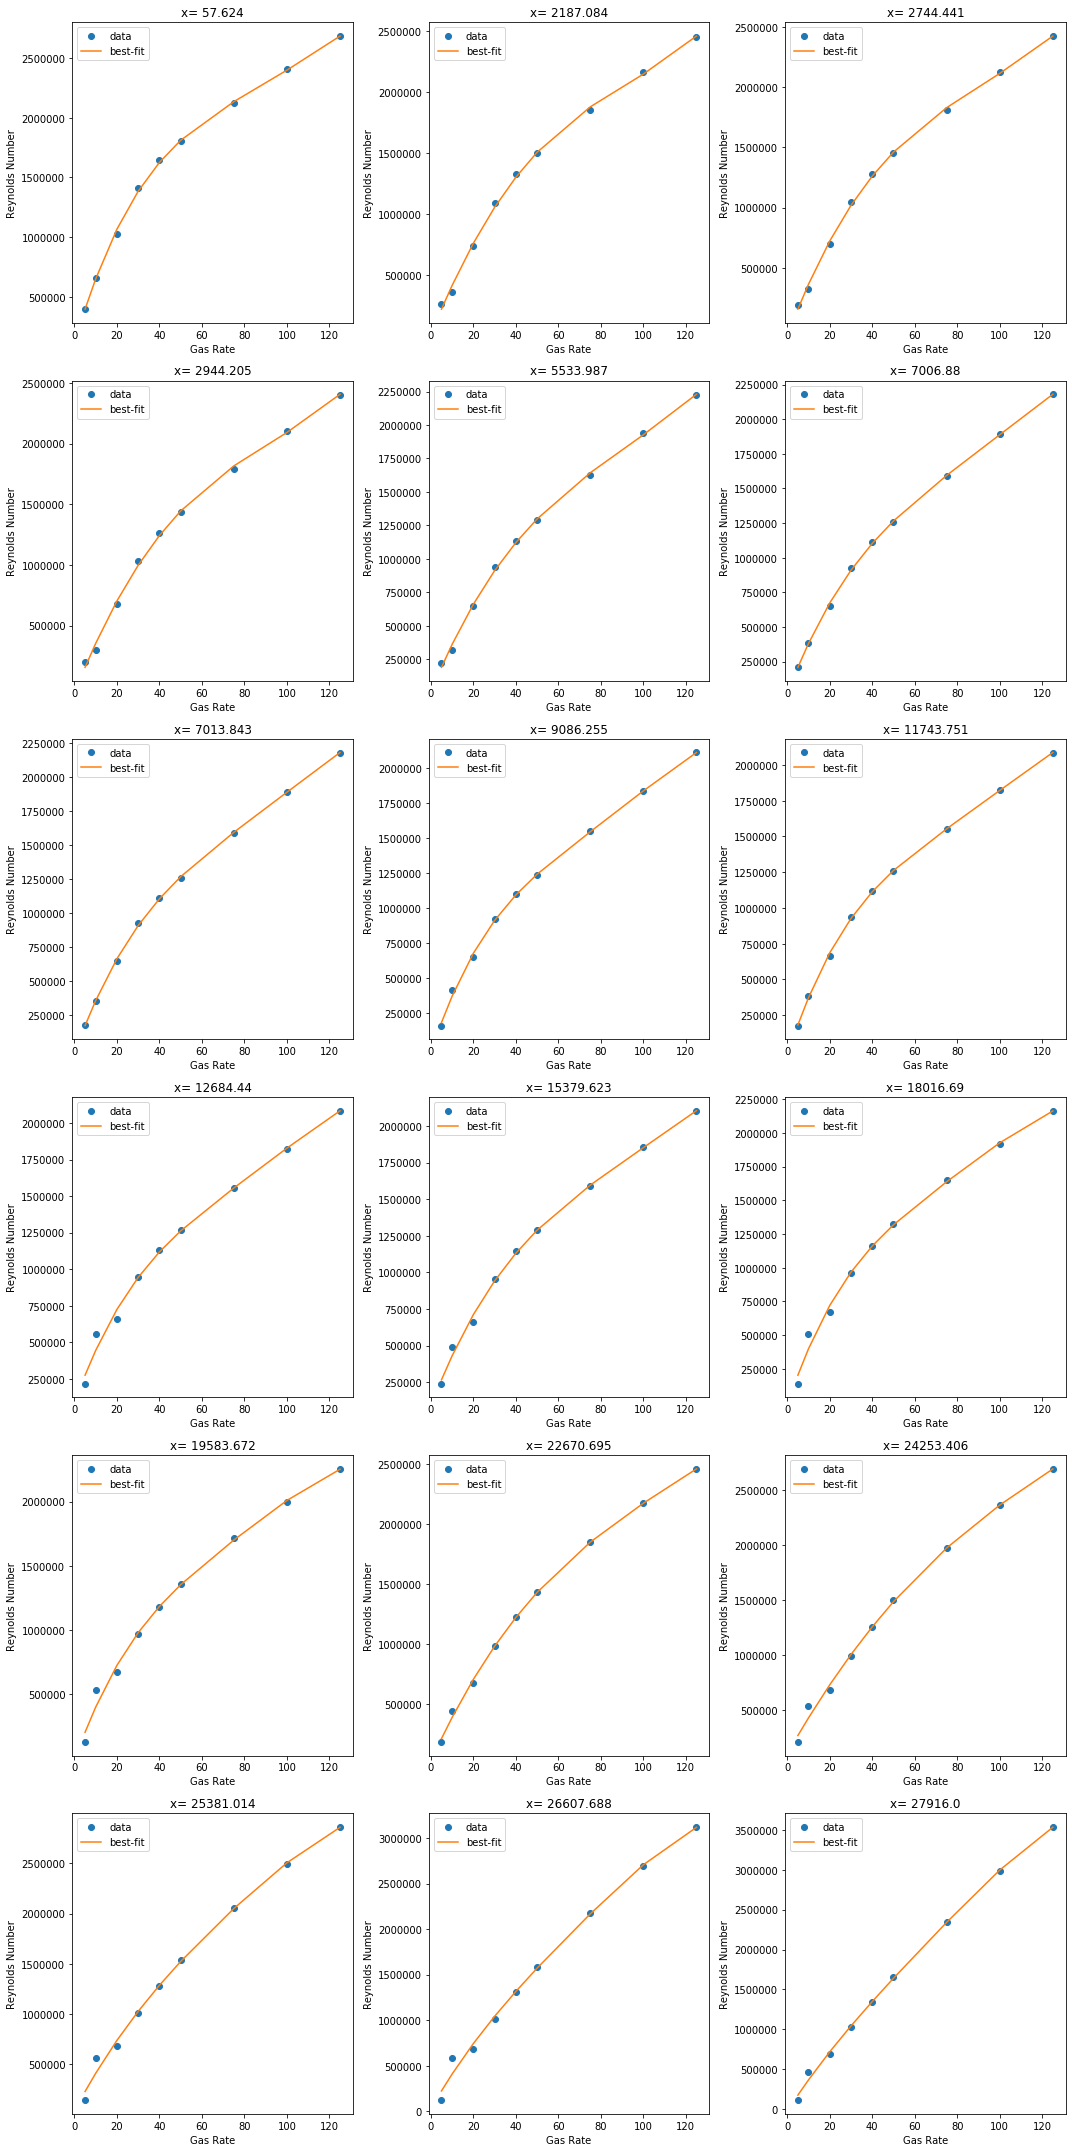

****
Residual plots:
****


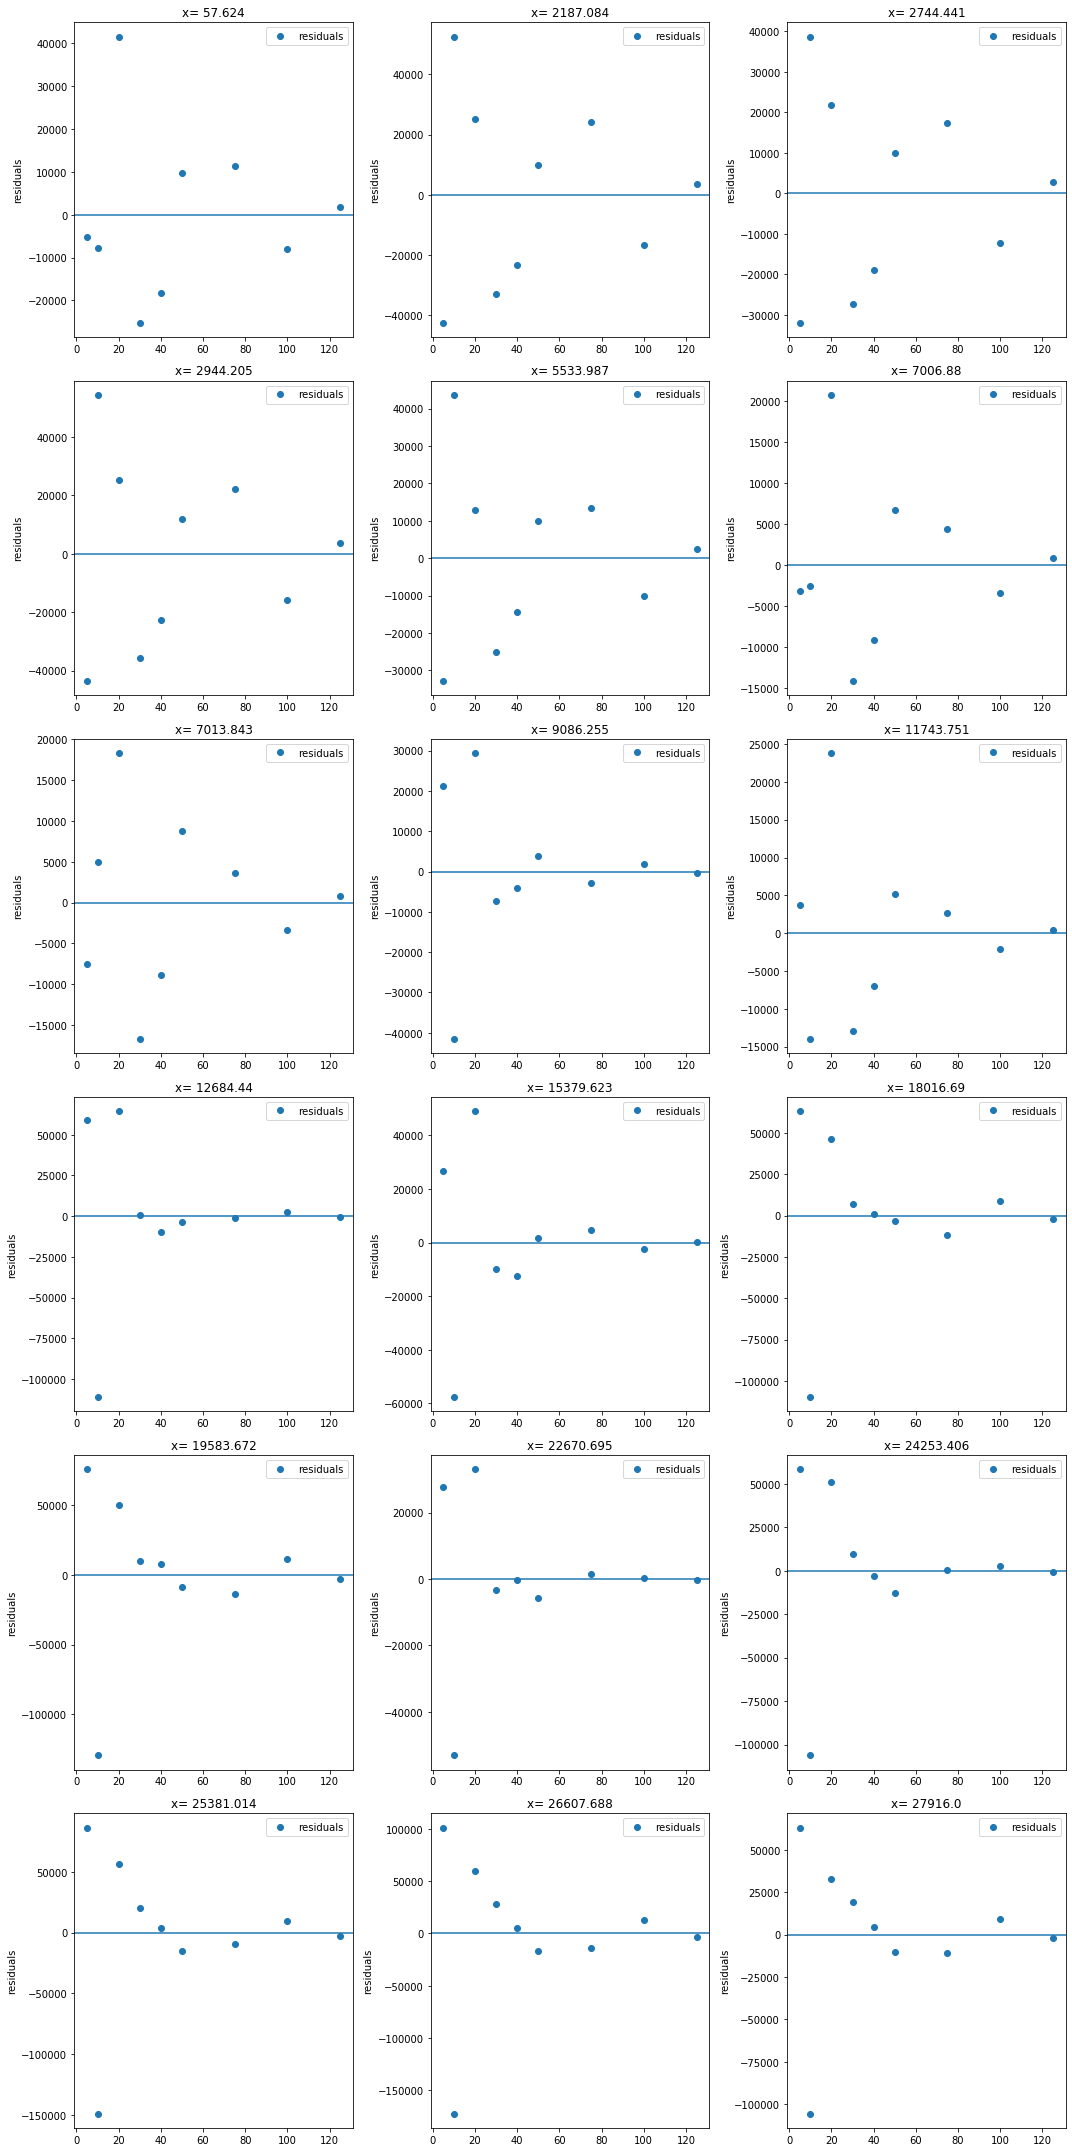

SSE:  24712779977.487423


In [29]:
fit_model(PolynomialModel(degree=4),6,3,df_reynolds,x,'Reynolds Number',15)

From the residual plots of the higher order polynomial we observe randomly dispersed errors. The SSE has reduced compared to the quadratic and linear fits. 

Of course, we need to be mindful of overfitting as we increase the order of the polynomial. This is because if we tailor the fitting too much on existing data, the model will fail to generalise to new data. To assess if the model overfits, we need more data to perform cross-validation.

## Exponential fitting

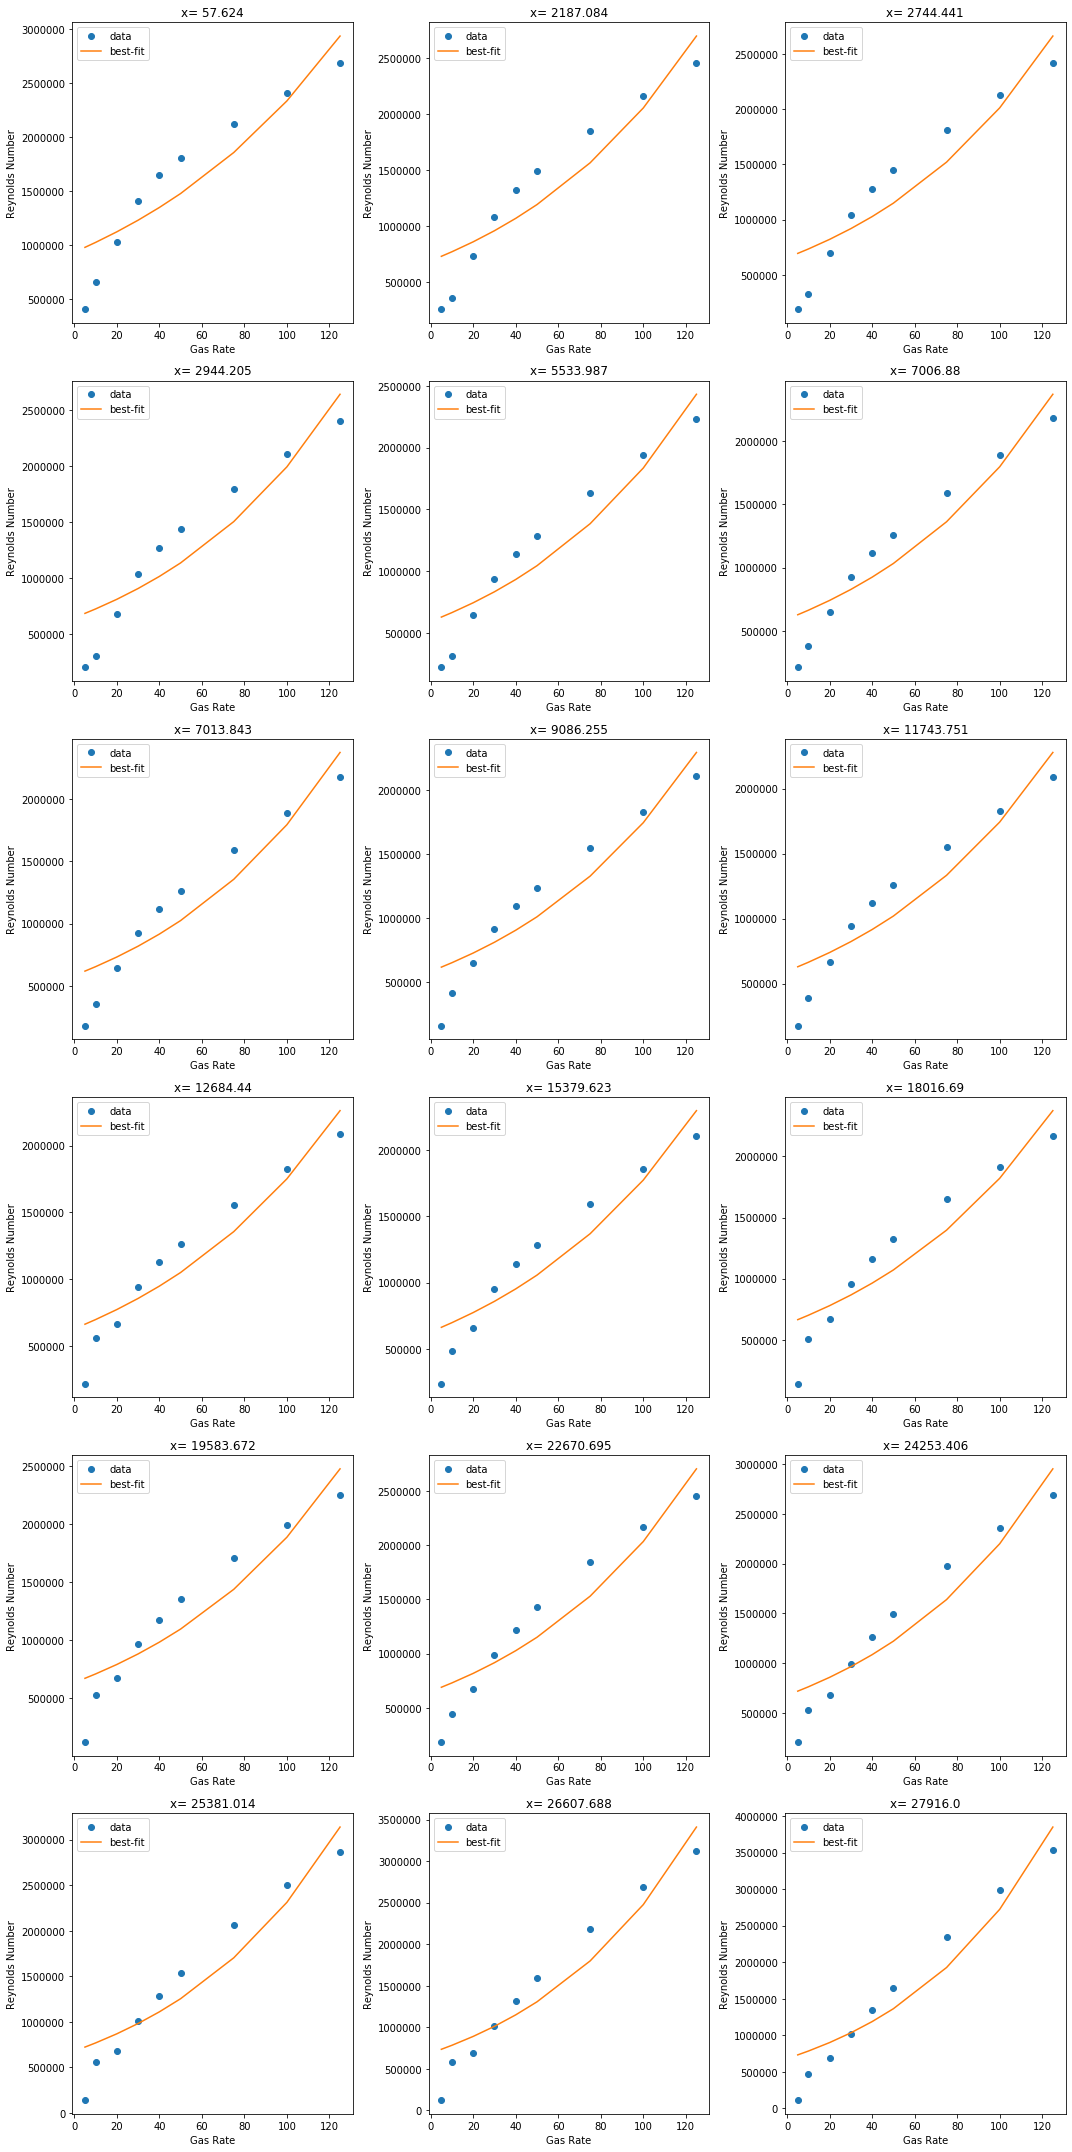

****
Residual plots:
****


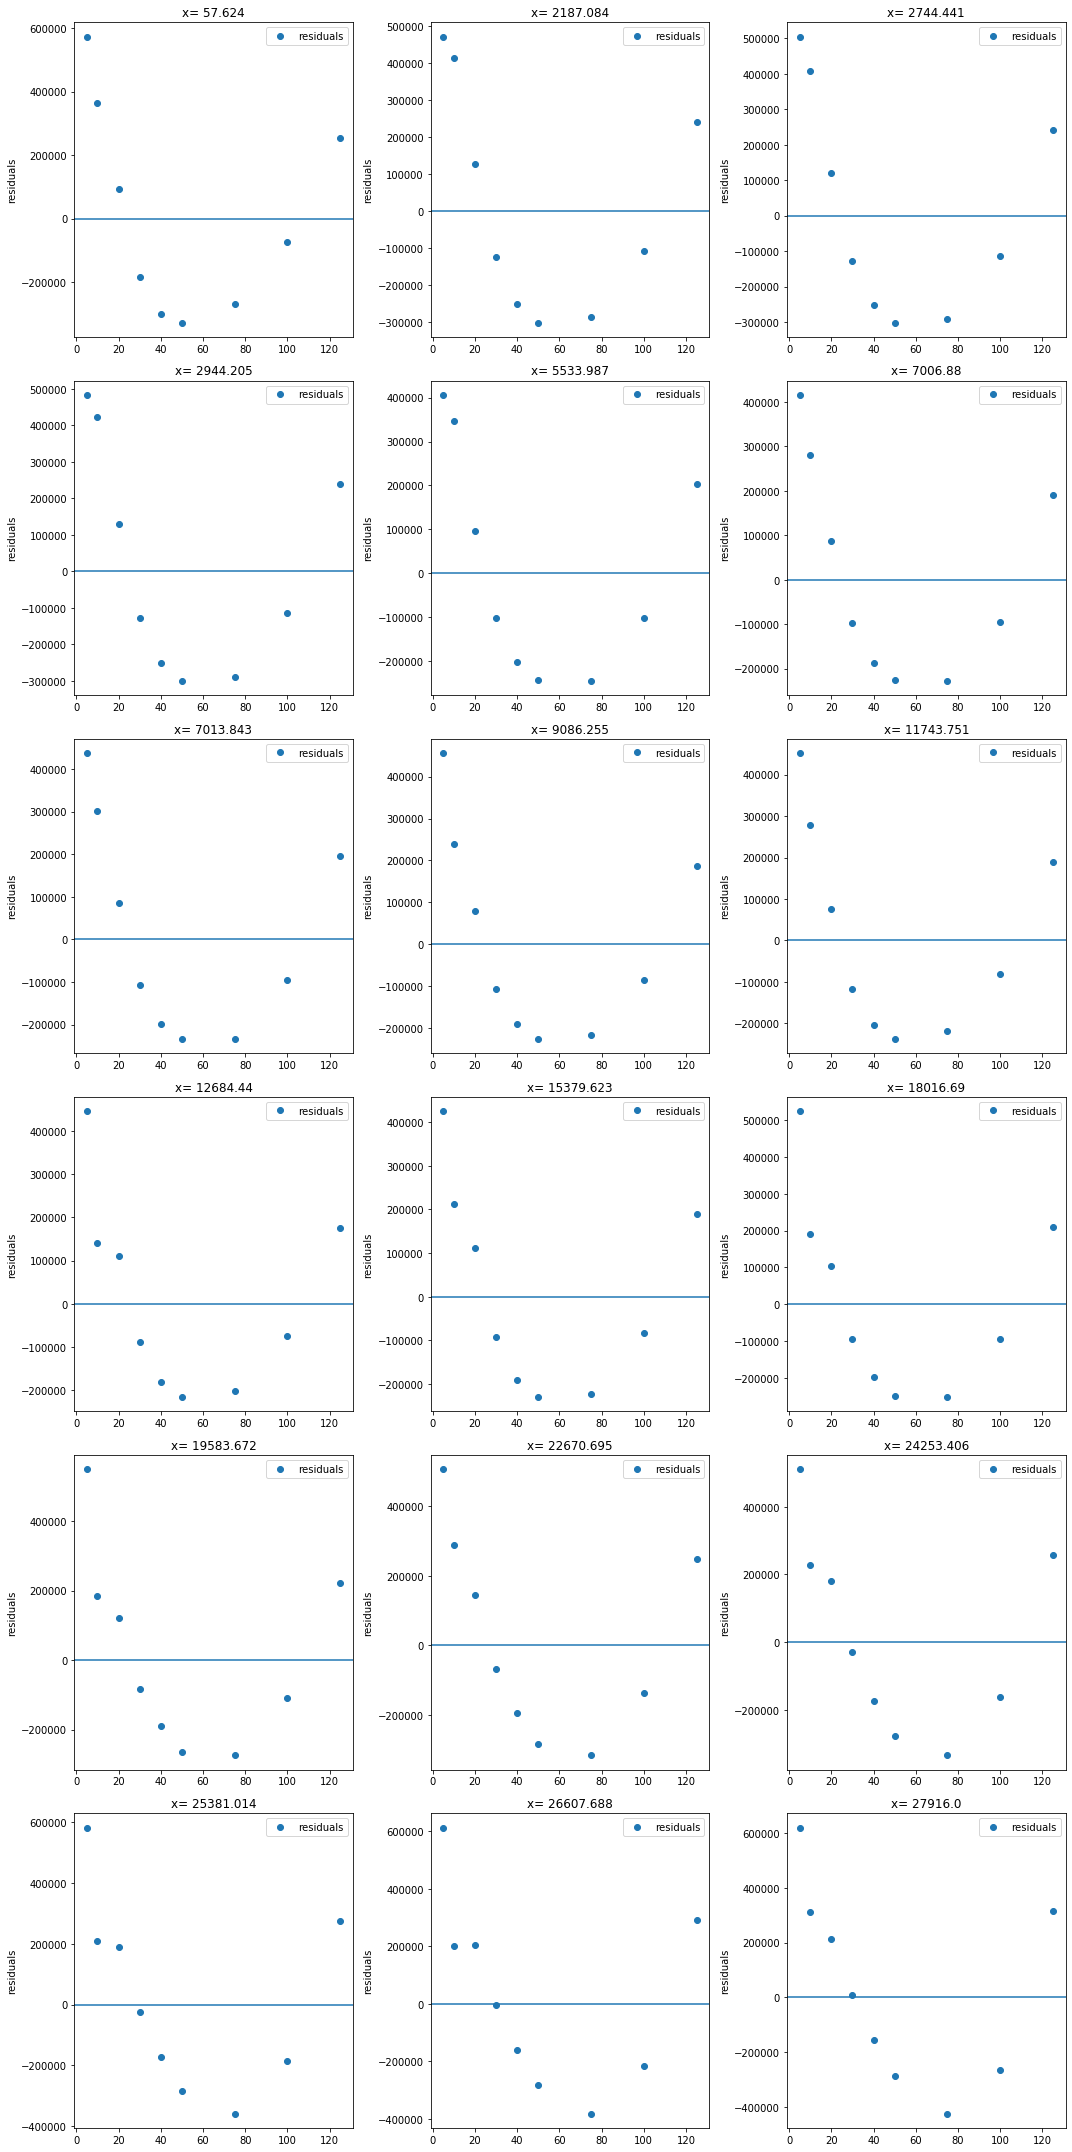

SSE:  1264958330114.702


In [30]:
fit_model(ExponentialModel(),6,3,df_reynolds,x,'Reynolds Number',15) 

The pattern in the residual plots suggests that predictions based on this model will result in greater error as we move towards the mid and endpoints of the range of the explanatory variable. This is not a great model. The SSE is higher than the polynomial fit.

## Power-law fitting


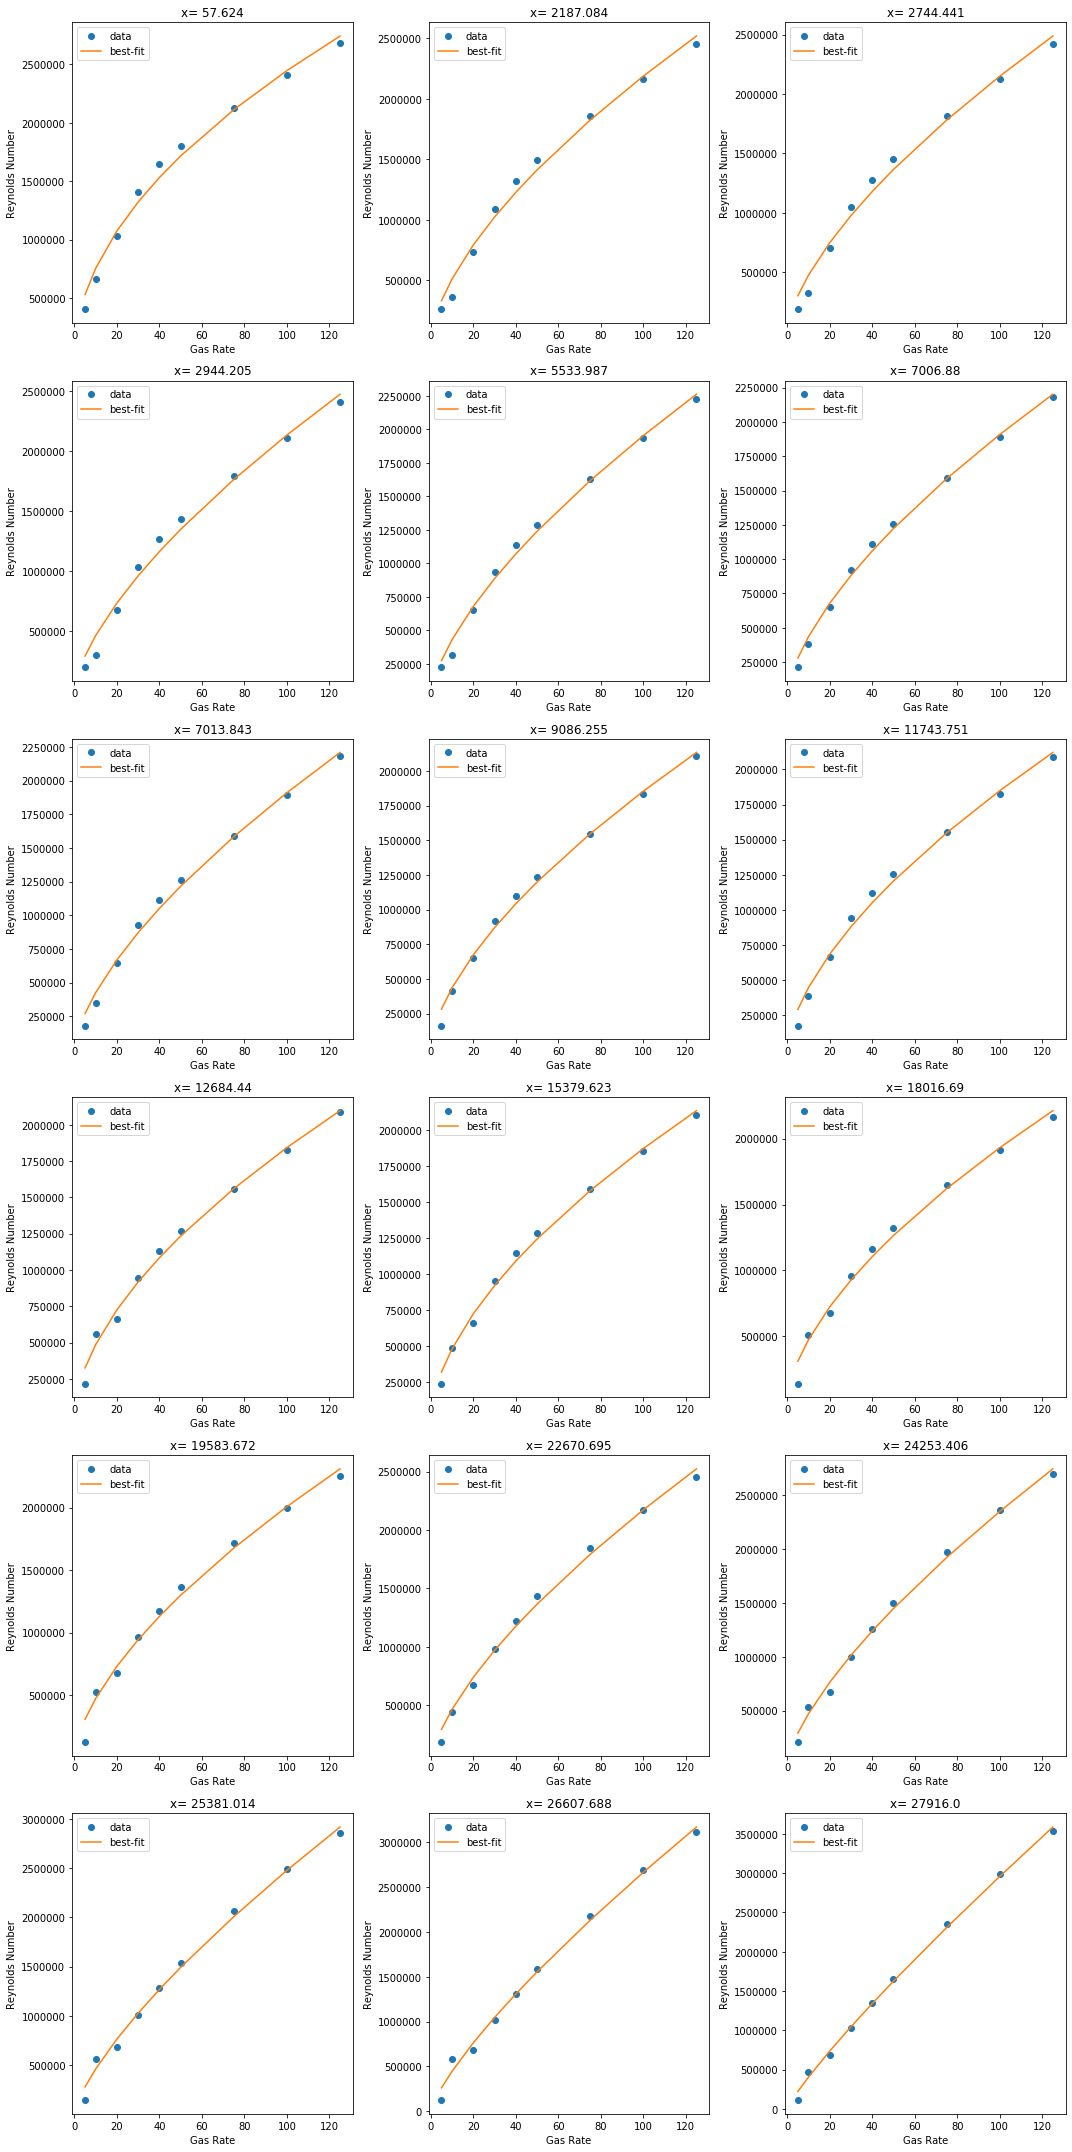

****
Residual plots:
****


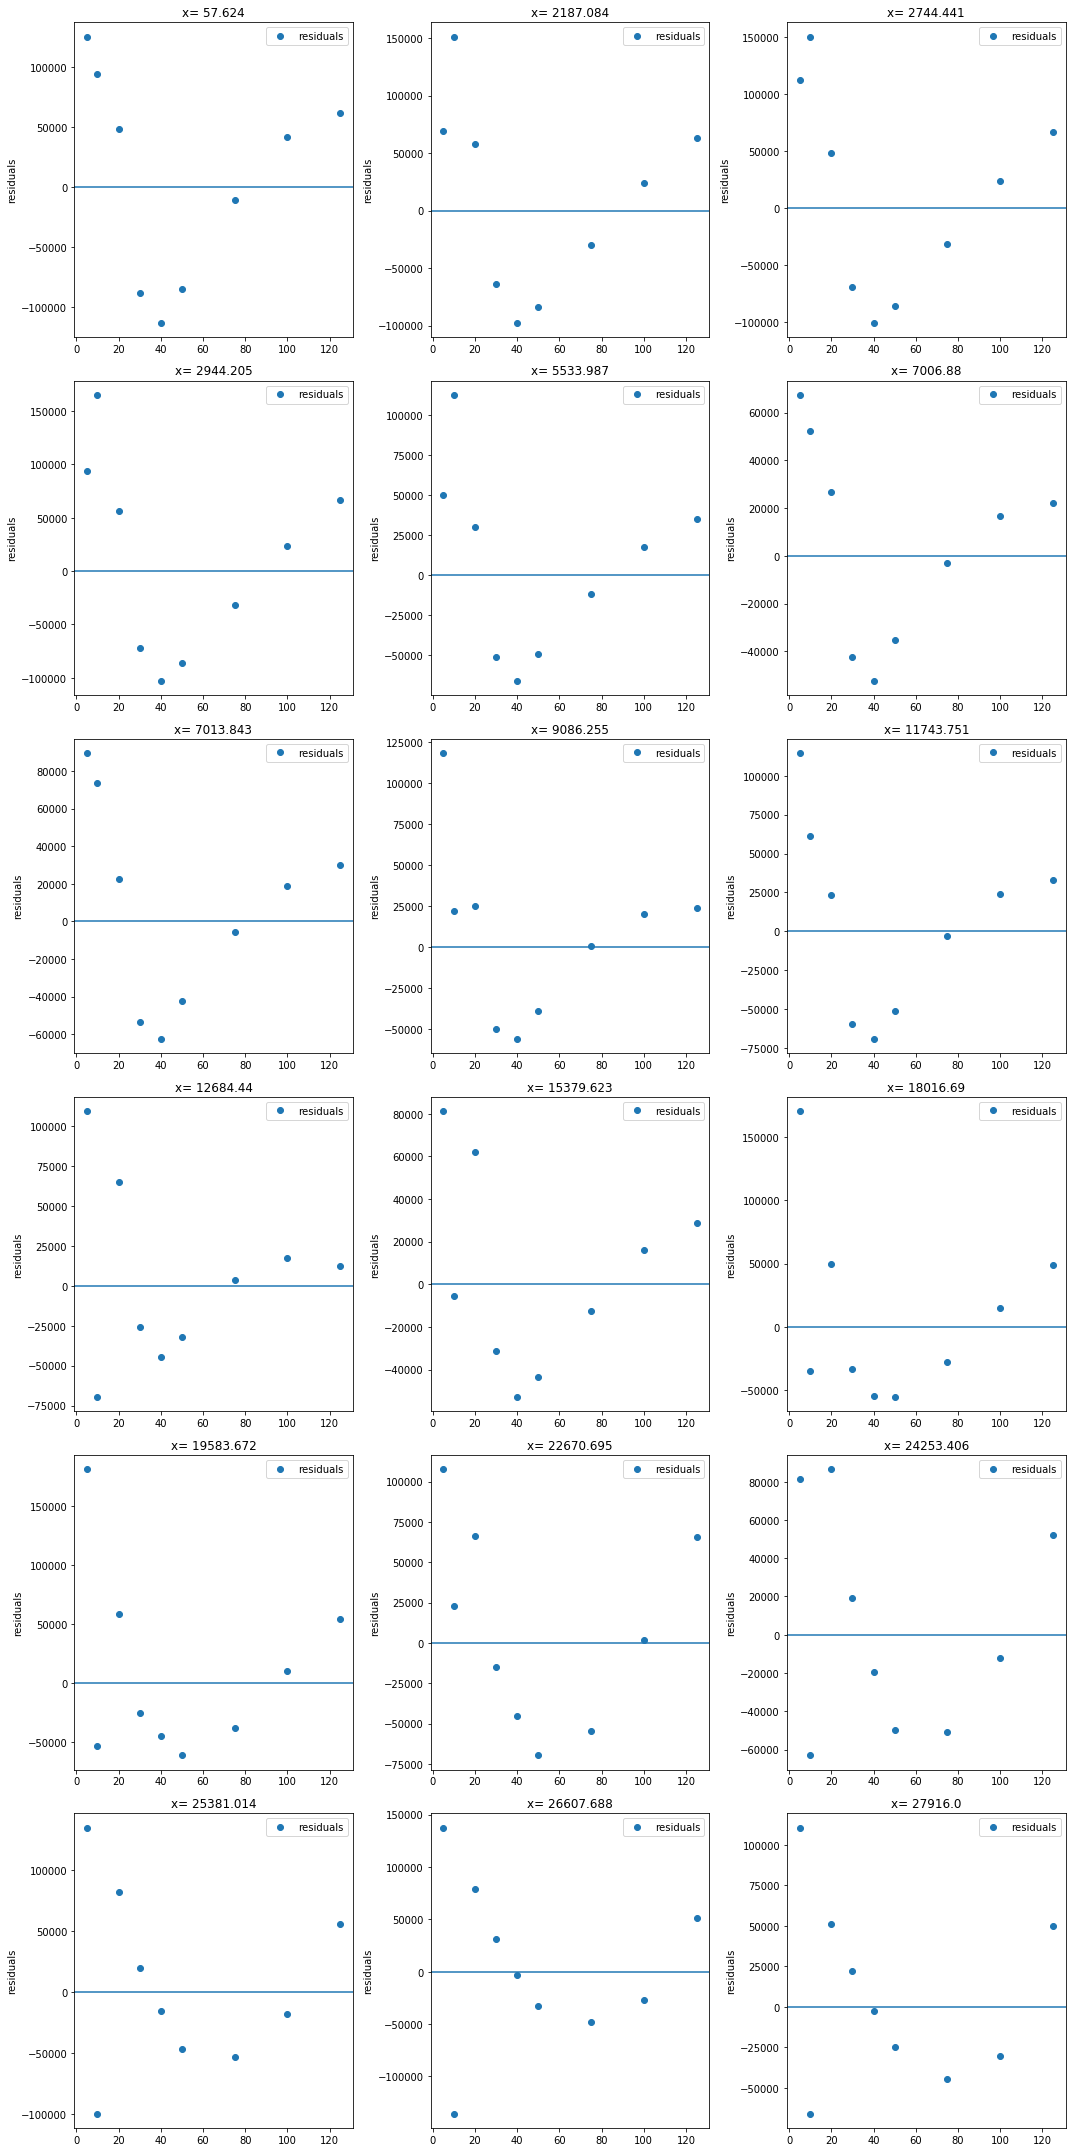

SSE:  76060283694.68788


In [31]:
fit_model(PowerLawModel(),6,3,df_reynolds,x,'Reynolds Number',15)

Once again we see a similar pattern of residuals where towards the mid and end points of the range of the explanatory variable there are larger erros. This is still a better model than the exponential but not as good as the polynomial. At some locations the error is not big but in other locations the error is quite big. 

## Logarithmic fitting

/Users/nikoletta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


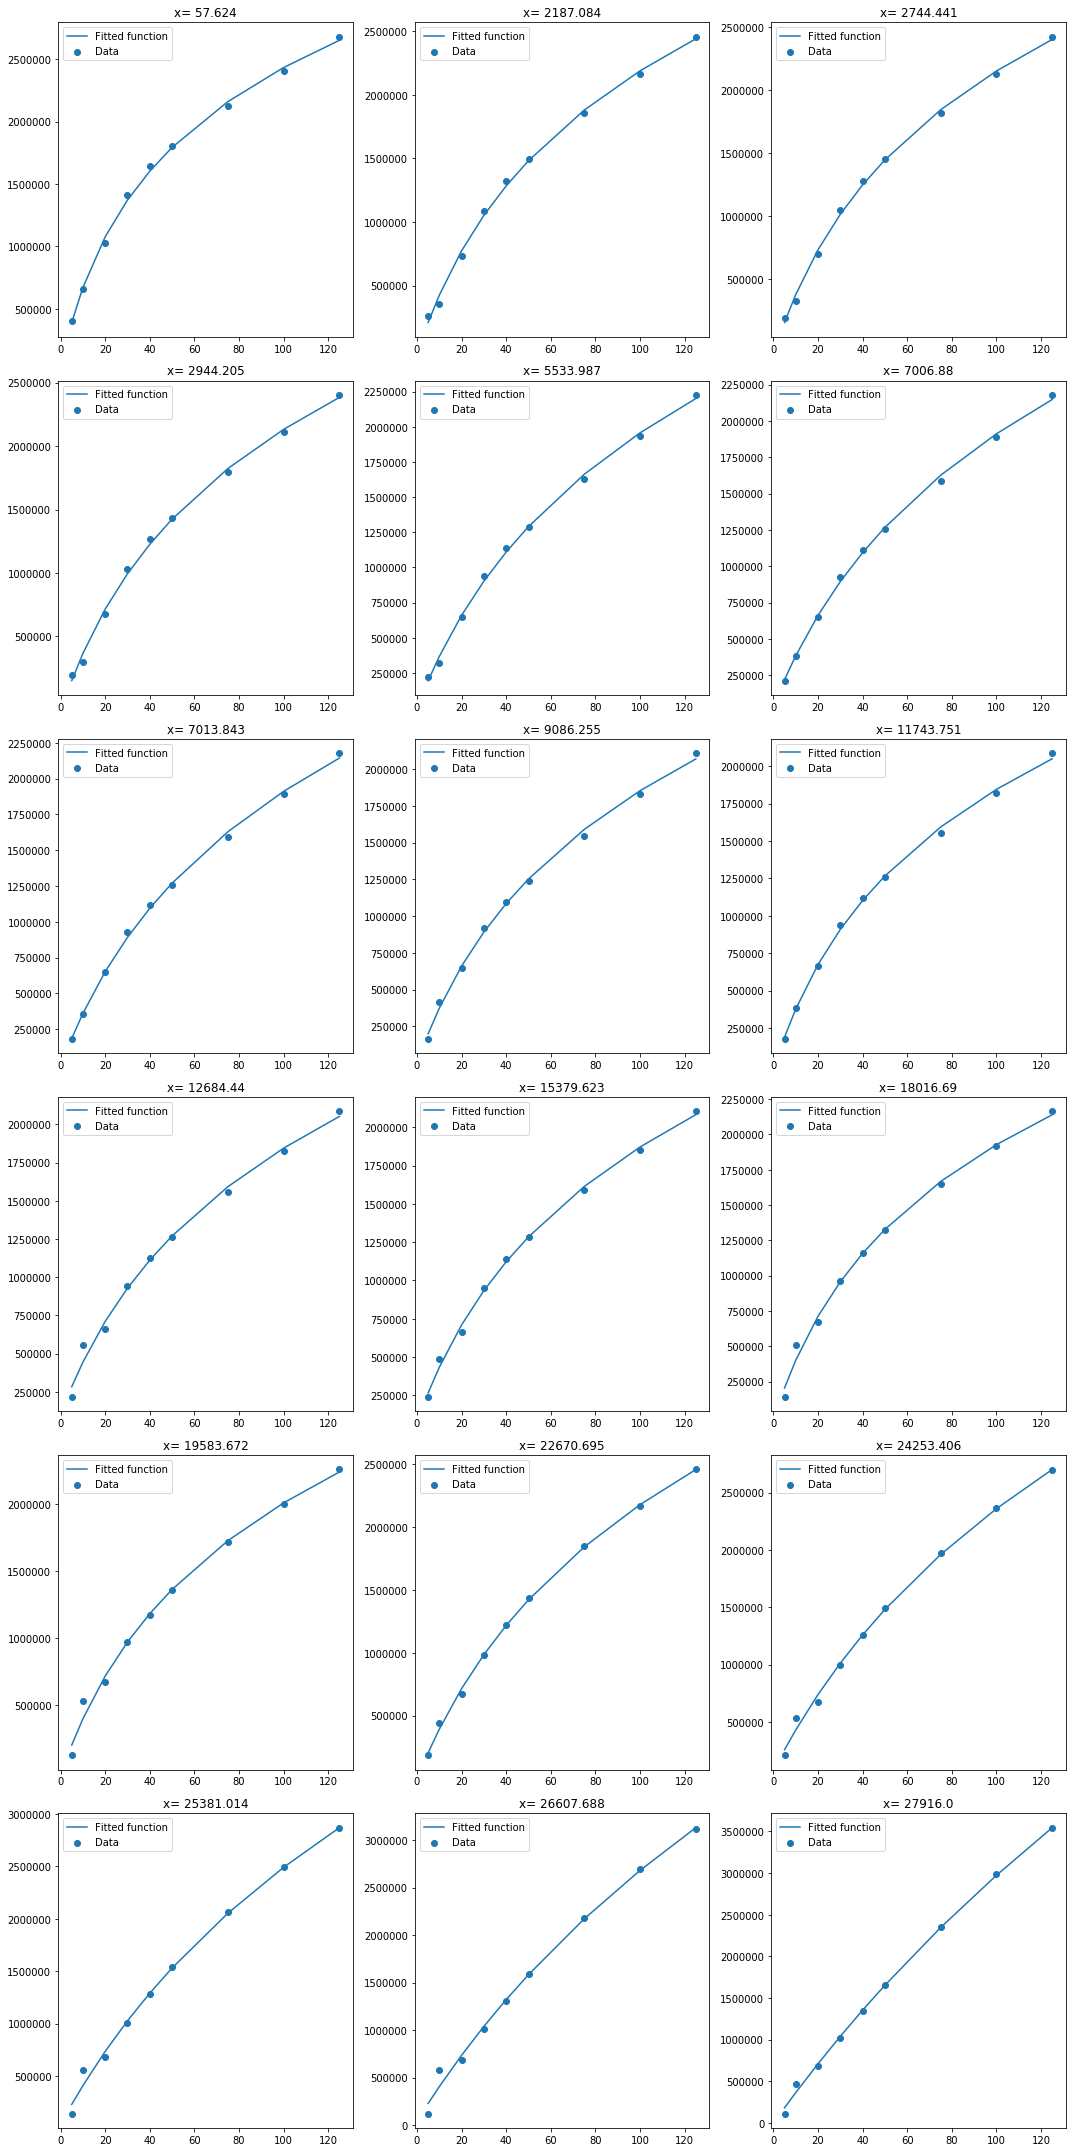

****
Residual plots:


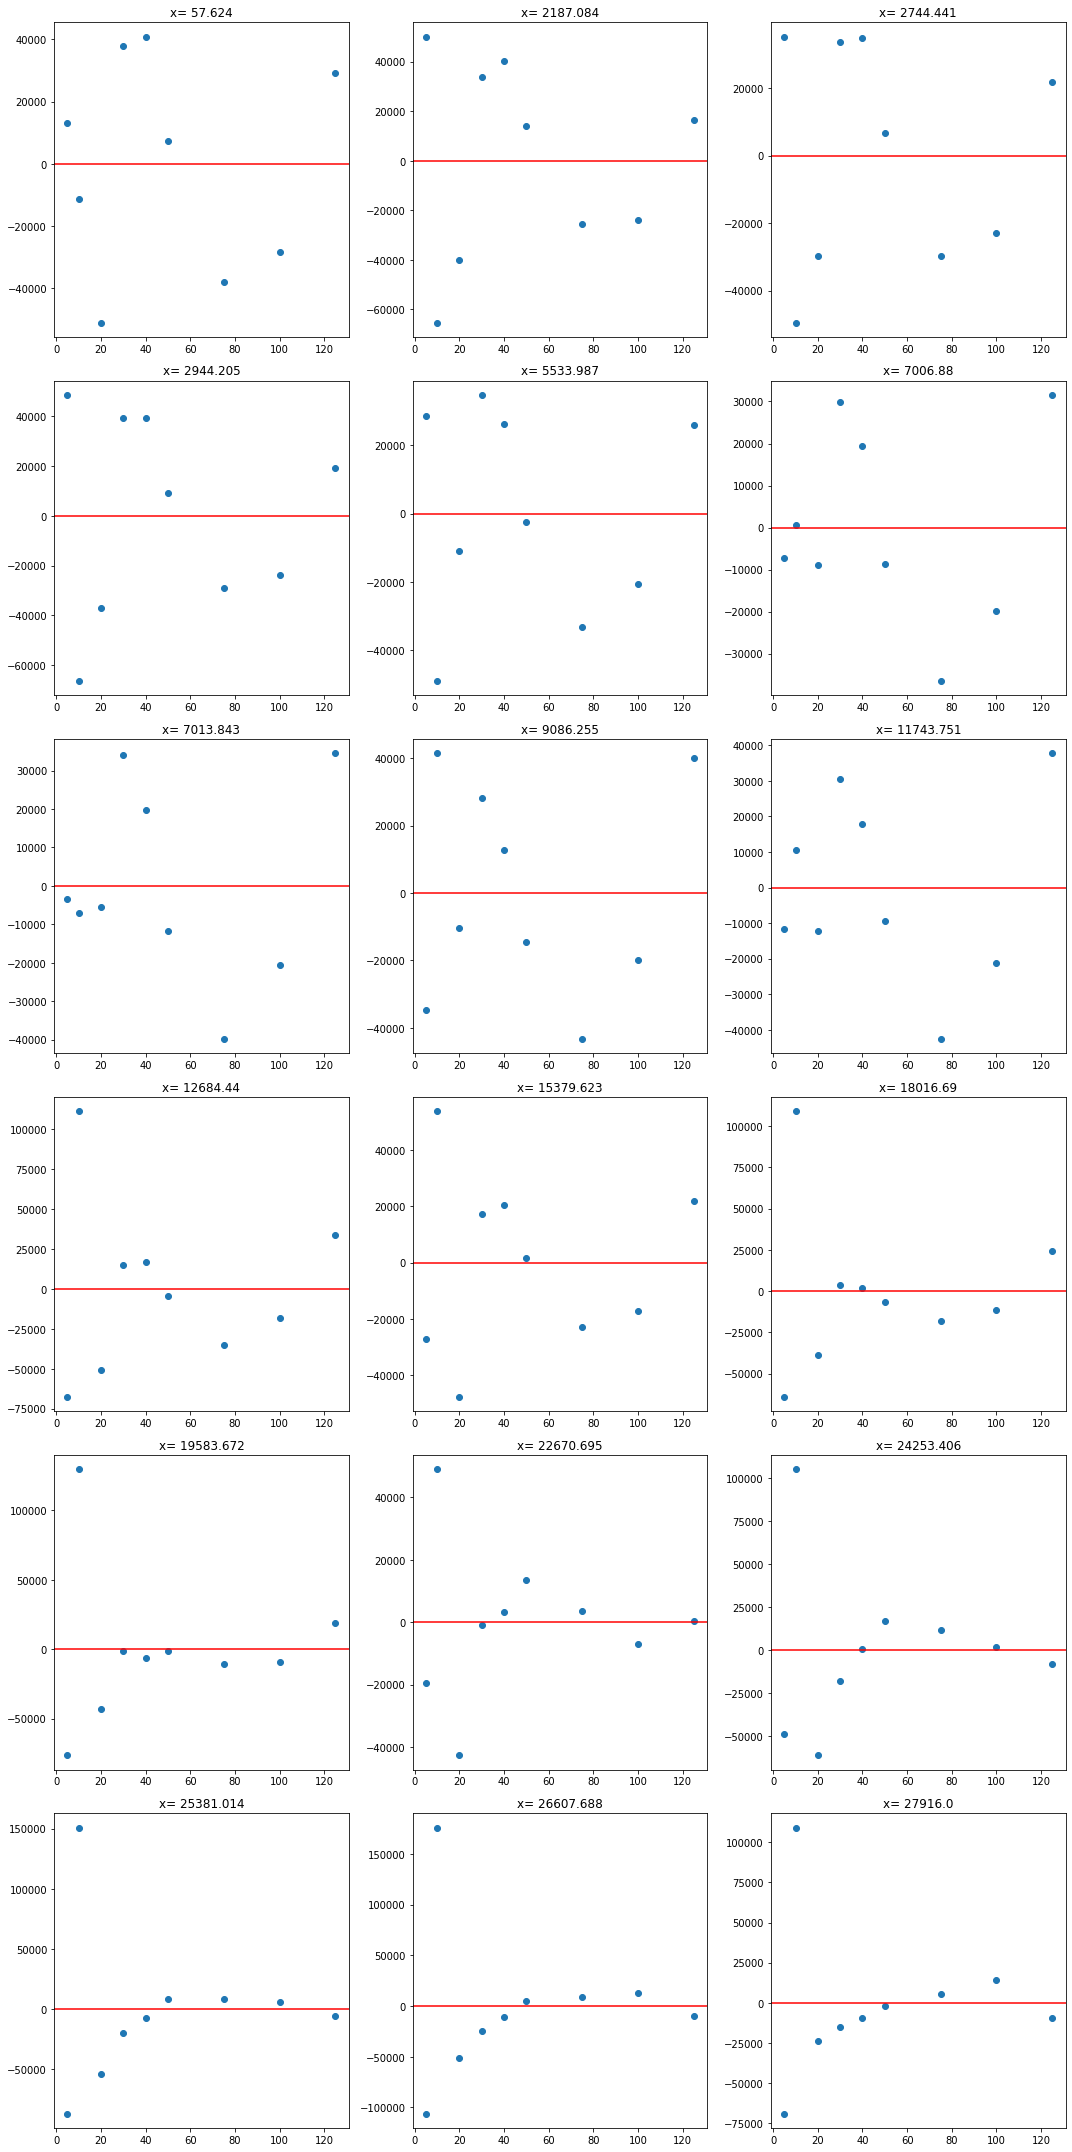

SSE:  268763544022.18005


In [32]:
fit_log(log_fit,6,3,df_reynolds,x,'Reynolds Number',15)

The logarithmic model looks like a good fit. In some locations the fit is better than other locations. The SSE is still higher than the 4th order polynomial fit.

# Froude regression


## Polynomial fitting
#### Degree 1 (linear)

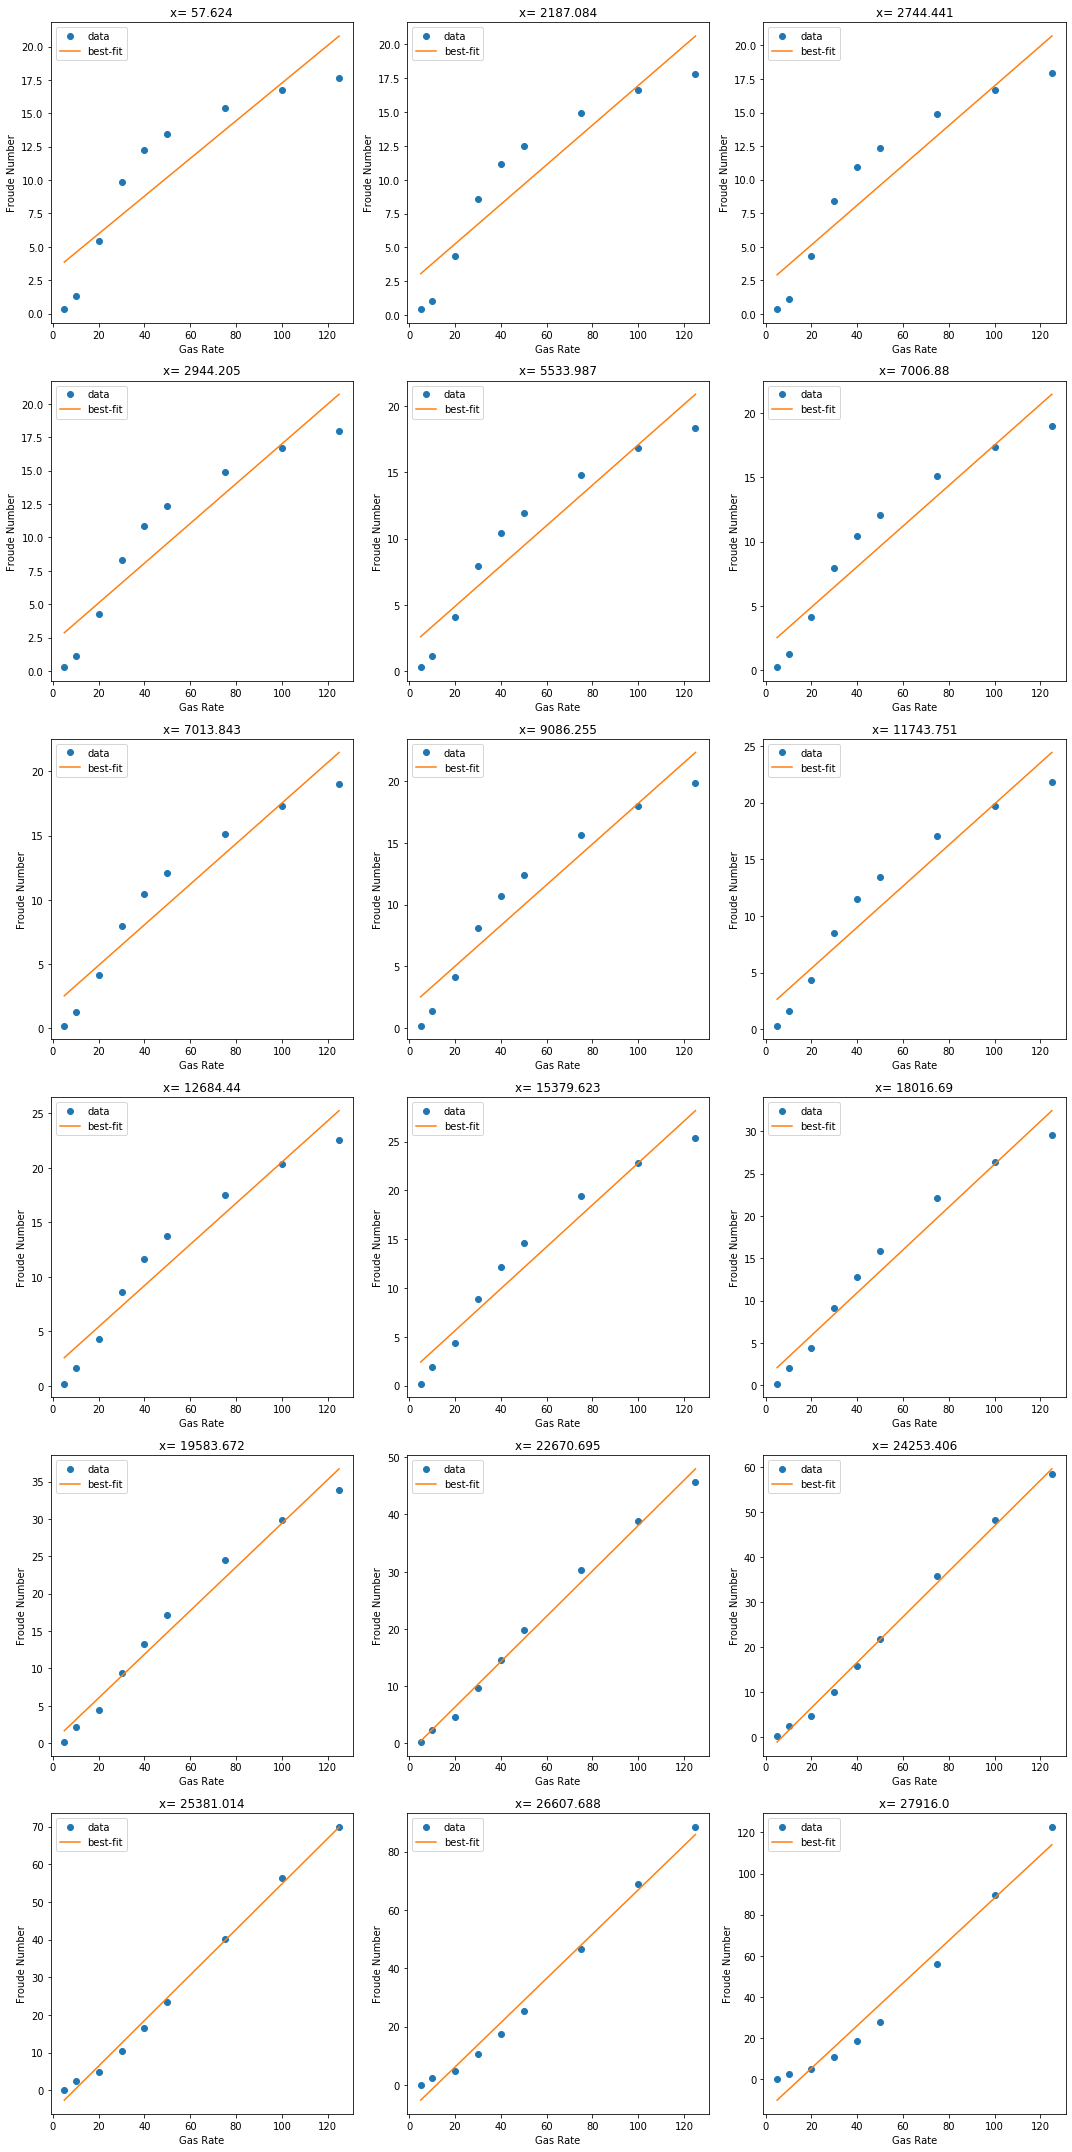

****
Residual plots:
****


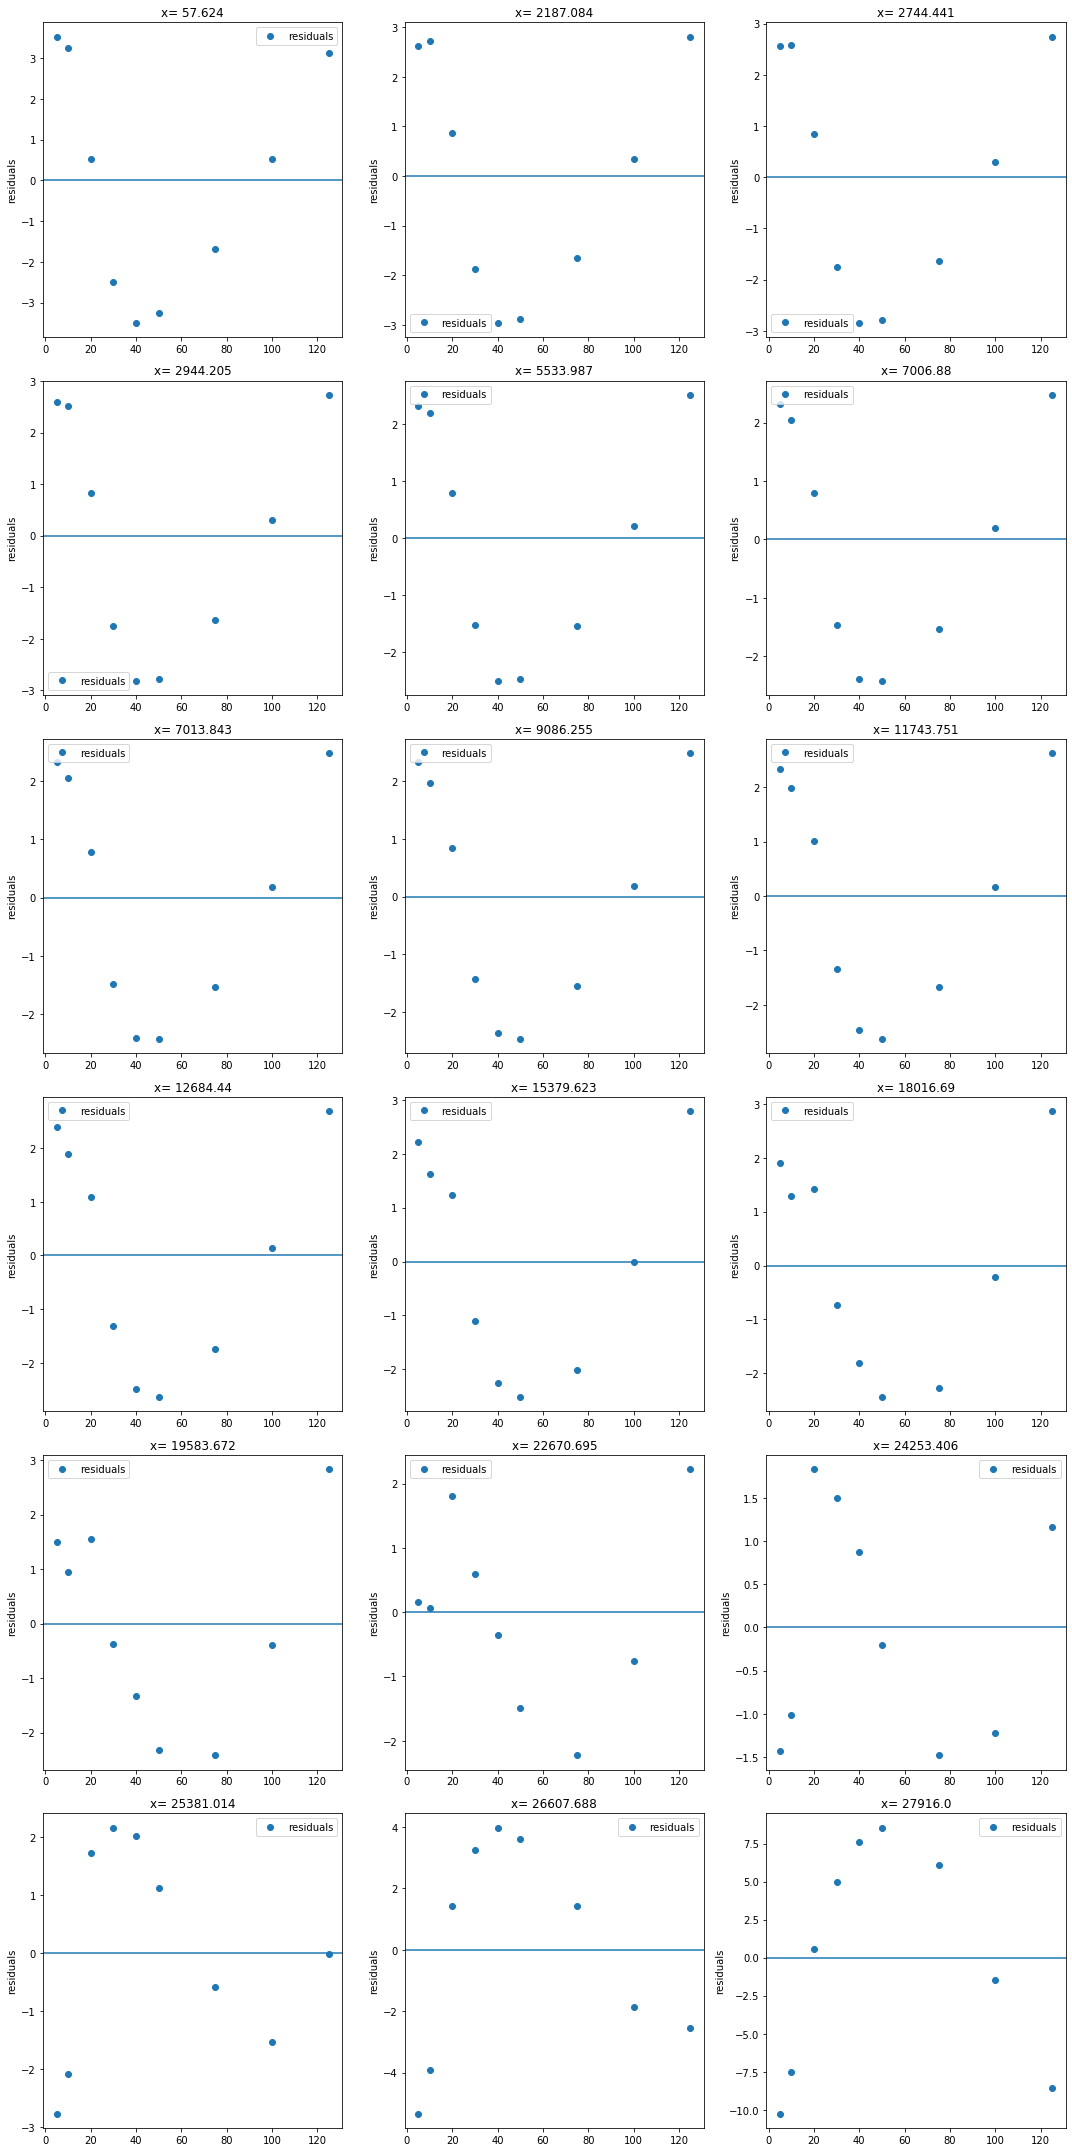

SSE:  119.57507727287371


In [33]:
fit_model(PolynomialModel(degree=1),6,3,df_froude,x,'Froude Number',15)

The patterns in the residual plots is non-random (variation of U-shapes), suggesting that a non-linear model is likely a better fit

#### Degree 2 (quadratic)

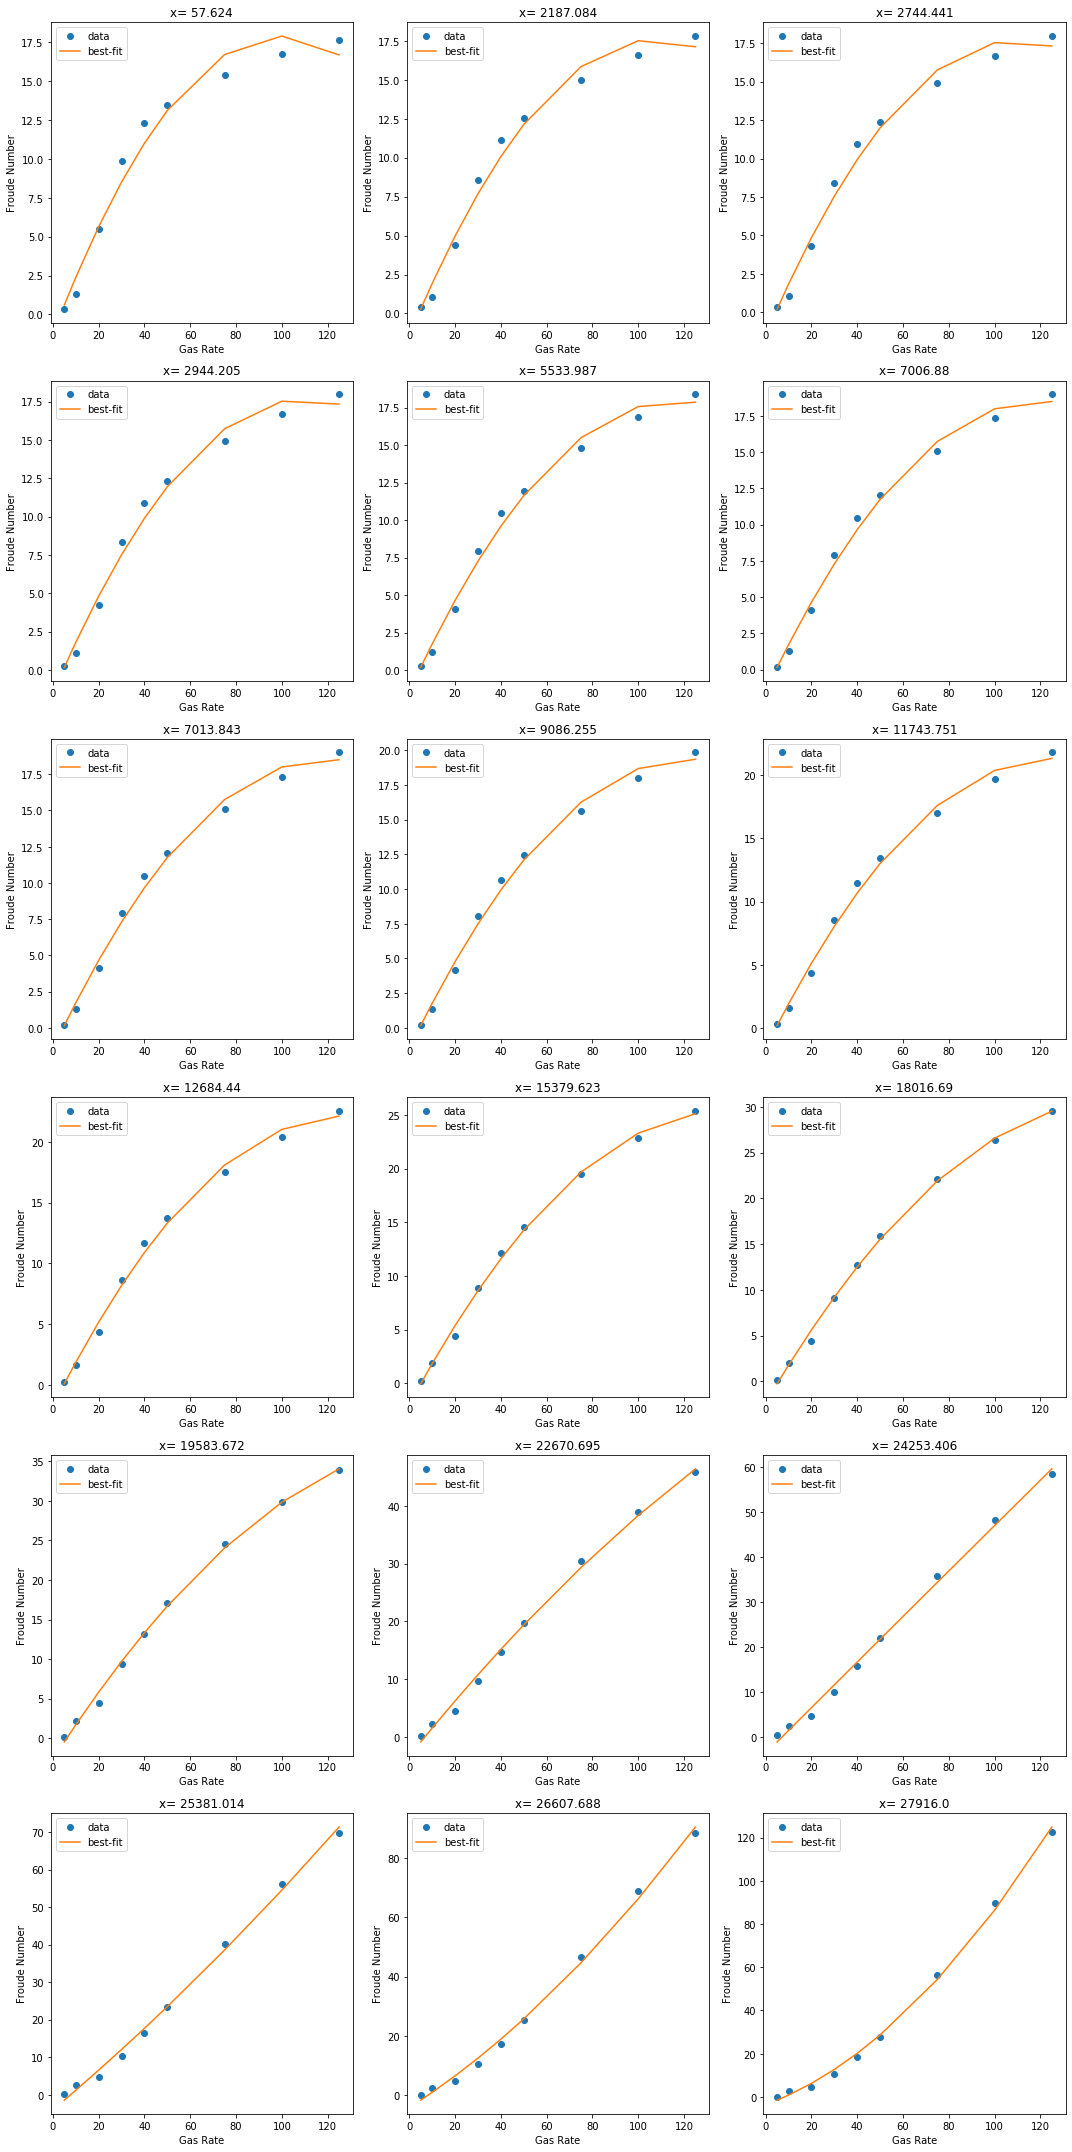

****
Residual plots:
****


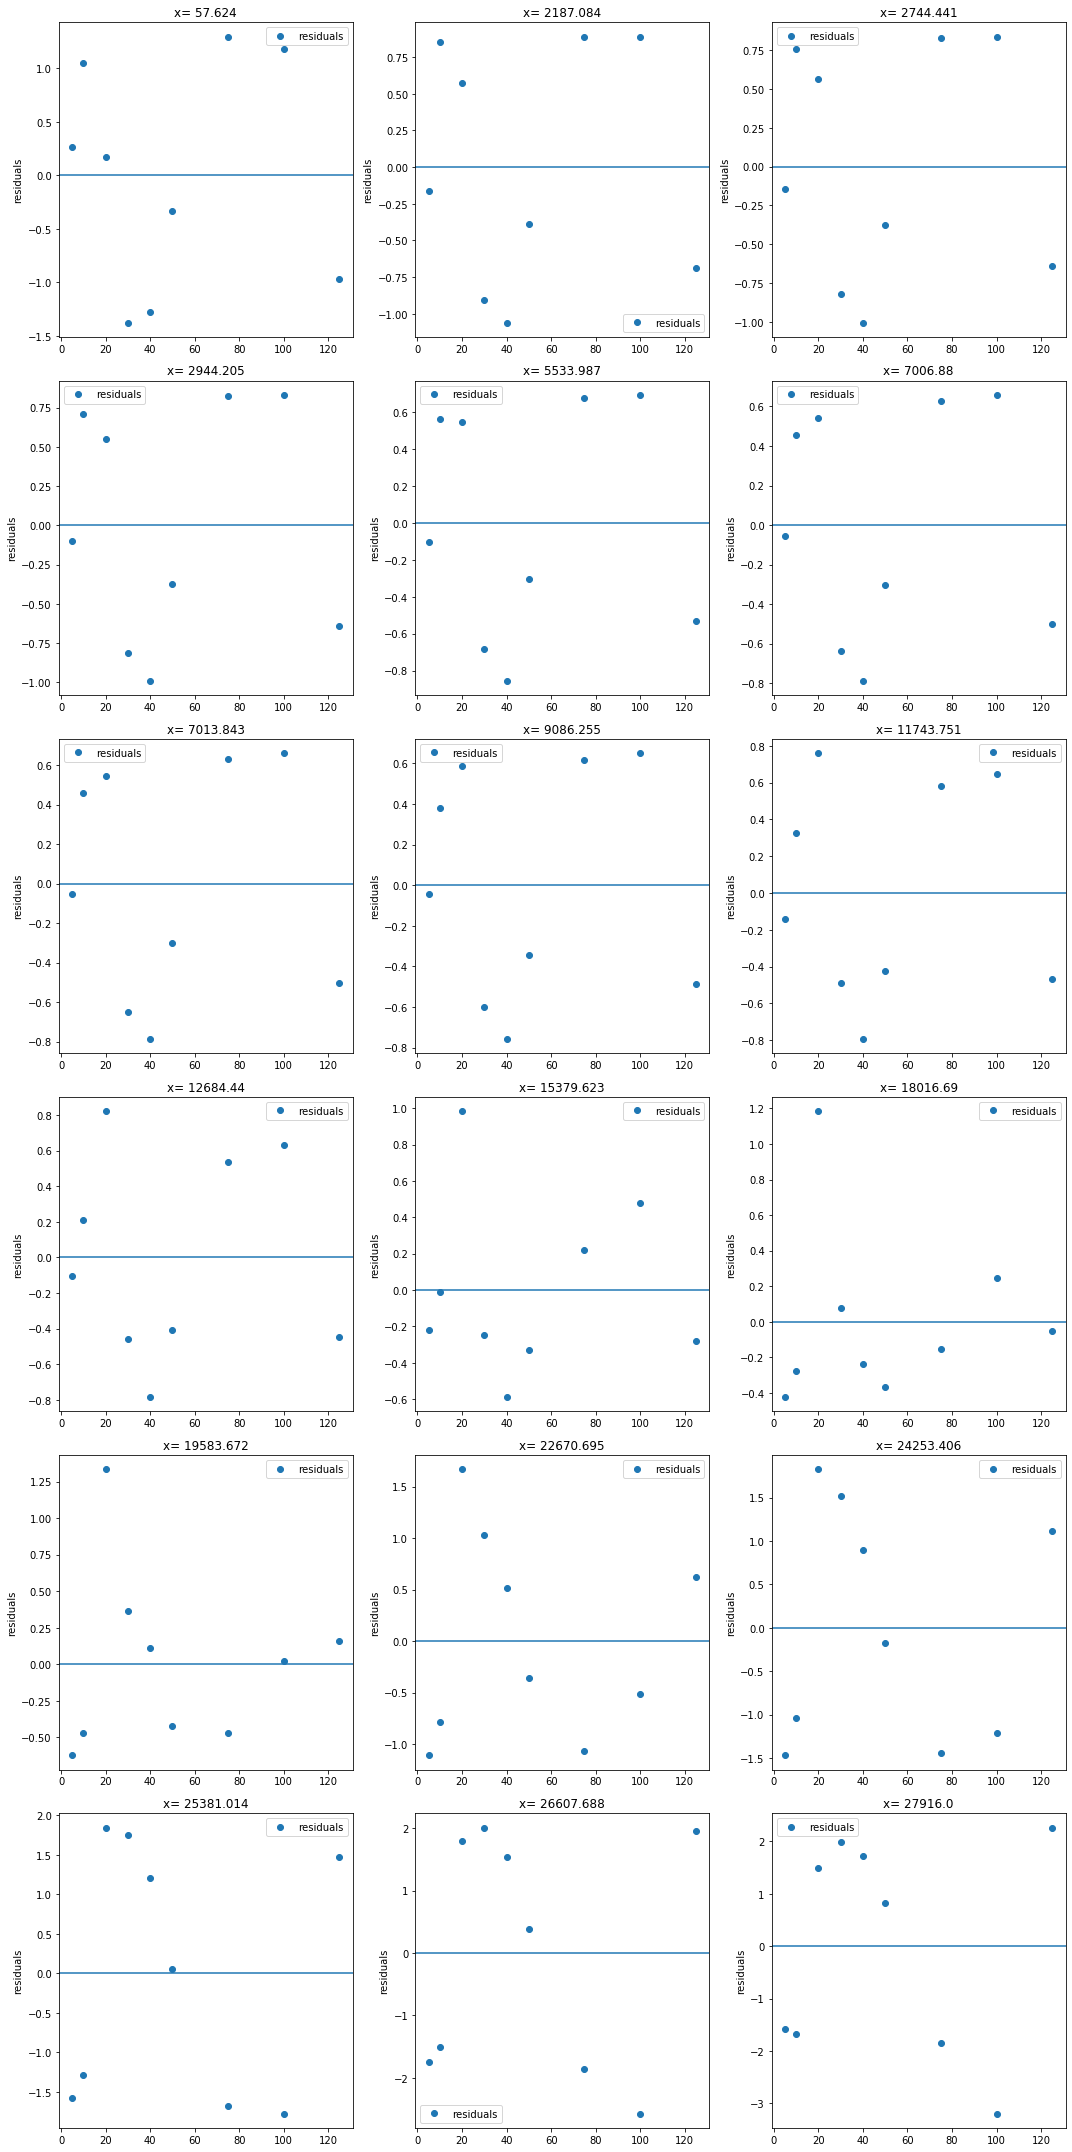

SSE:  16.852693022452662


In [34]:
fit_model(PolynomialModel(degree=2),6,3,df_froude,x,'Froude Number',15)

The residuals are fairly dispersed. We will next try a higher order polynomial. E.g. a third degree

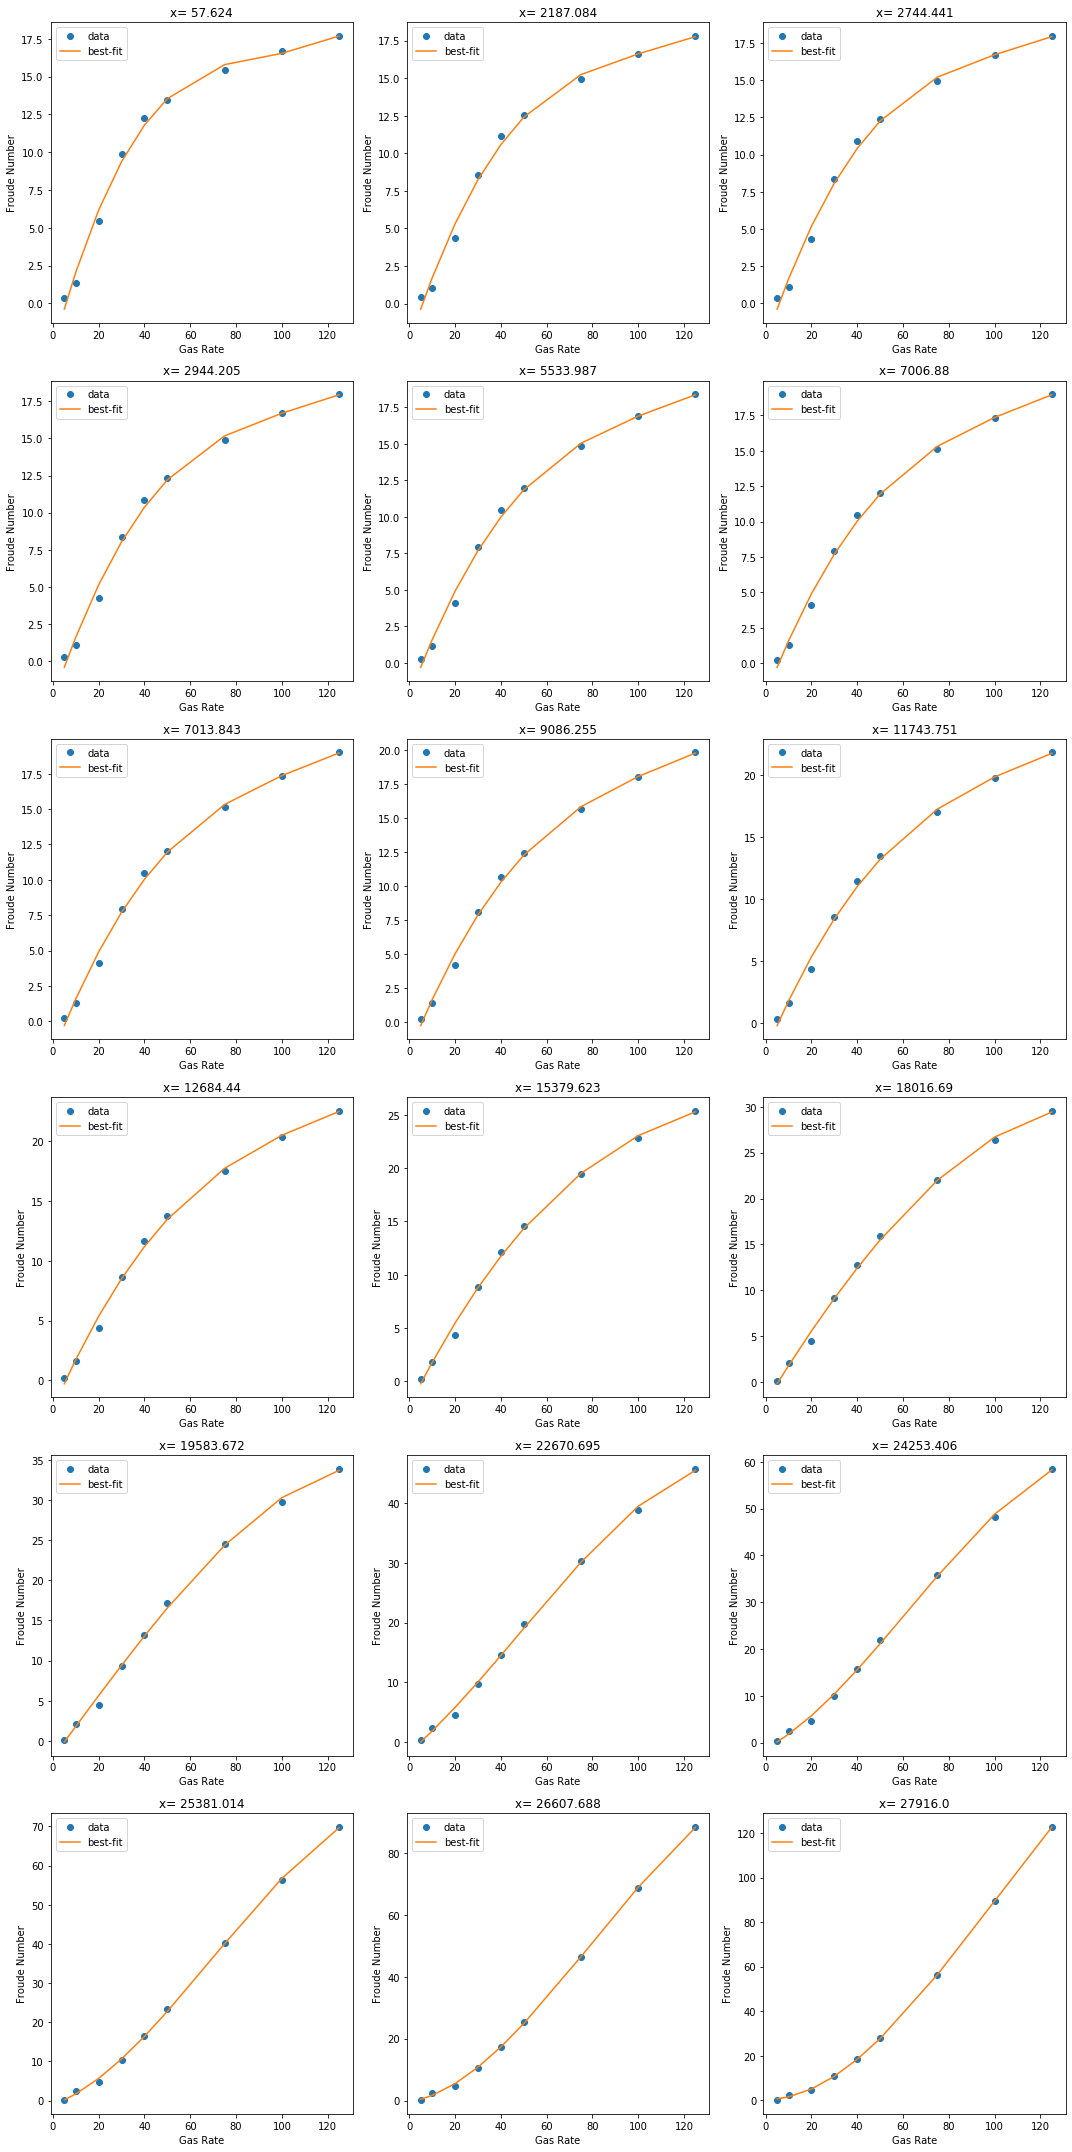

****
Residual plots:
****


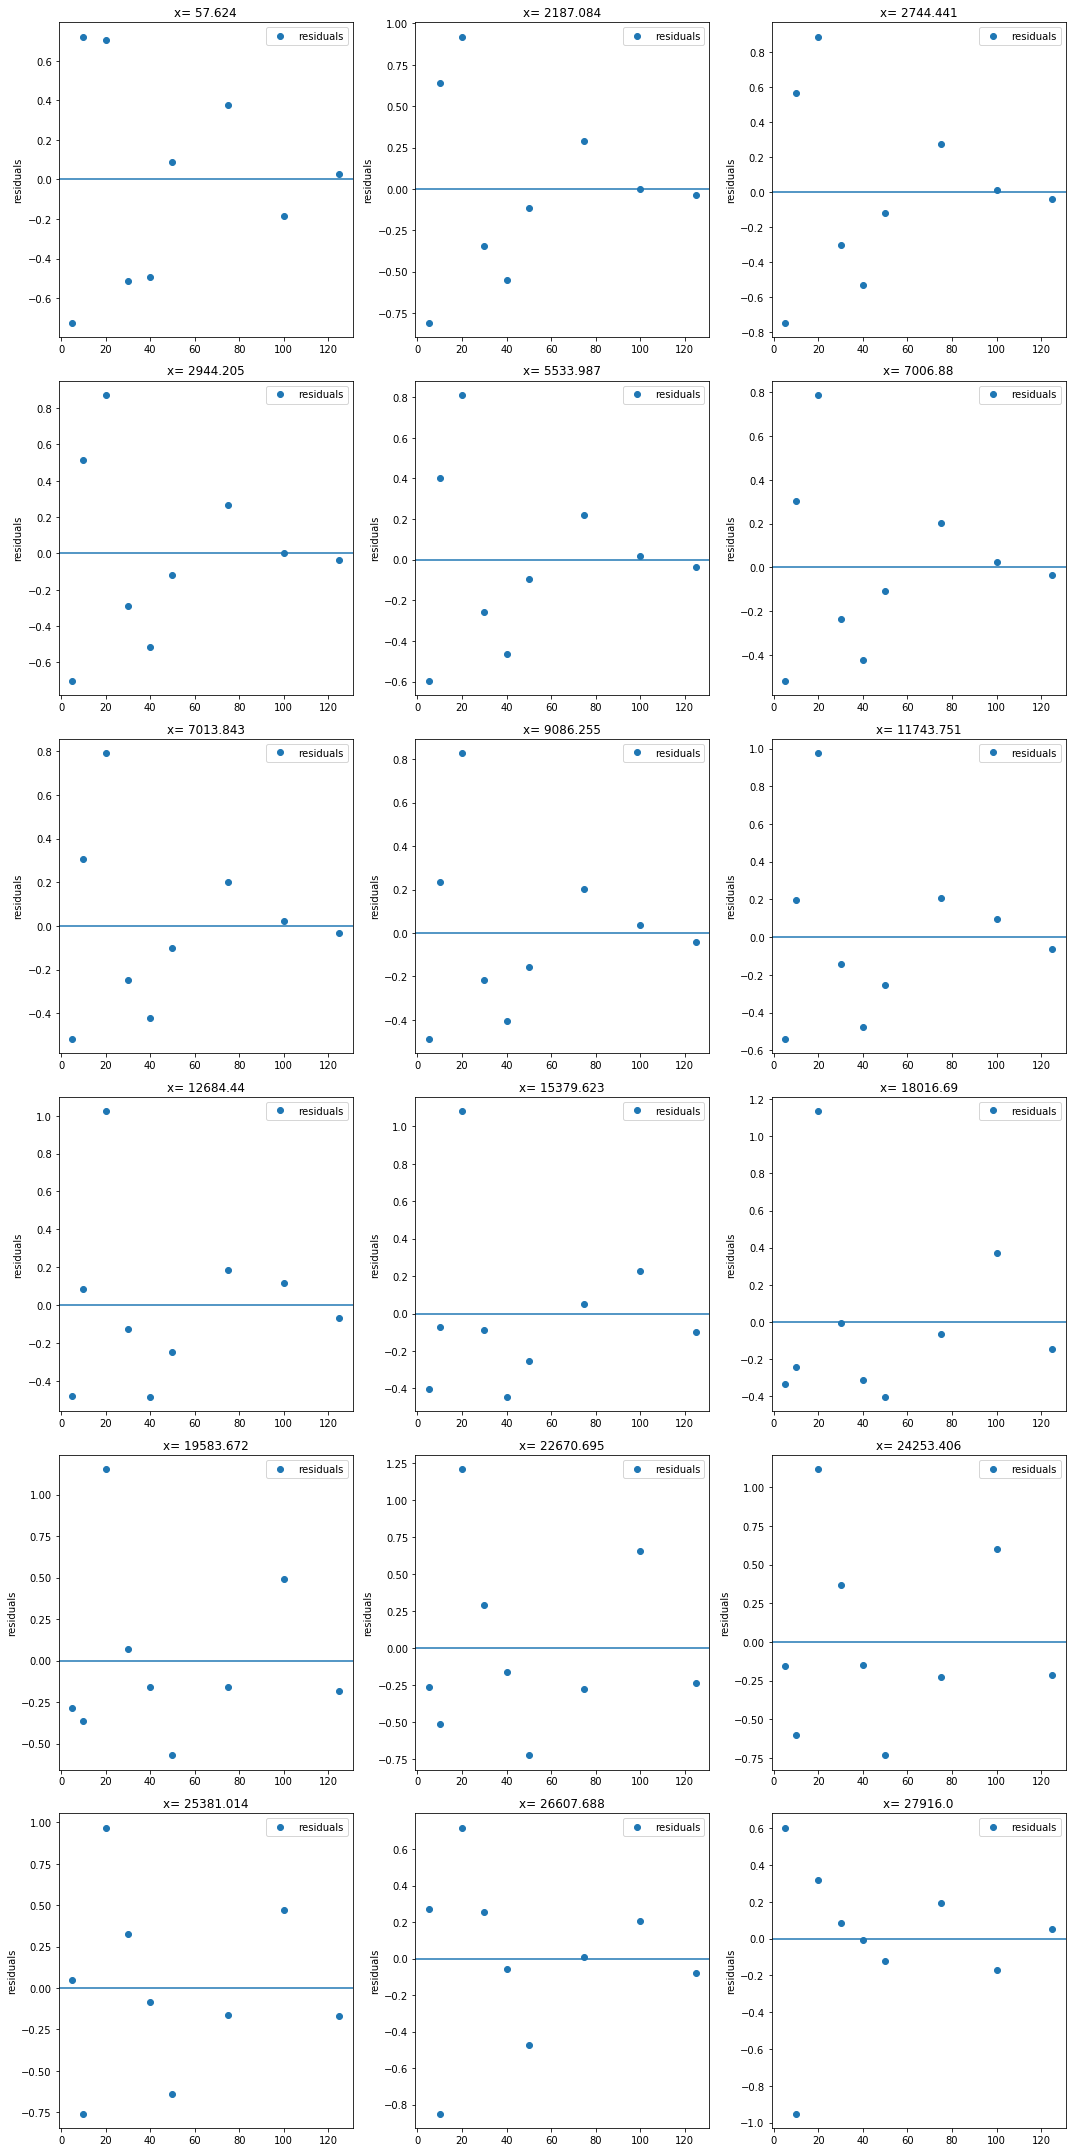

SSE:  3.8102438938258456


In [35]:
fit_model(PolynomialModel(degree=3),6,3,df_froude,x,'Froude Number',15)

The scatter plots of the residuals for this model follow a more randomly scattered pattern compared to the linear and quadratic model. The SSE has dramatically reduced. 

## Exponential fitting

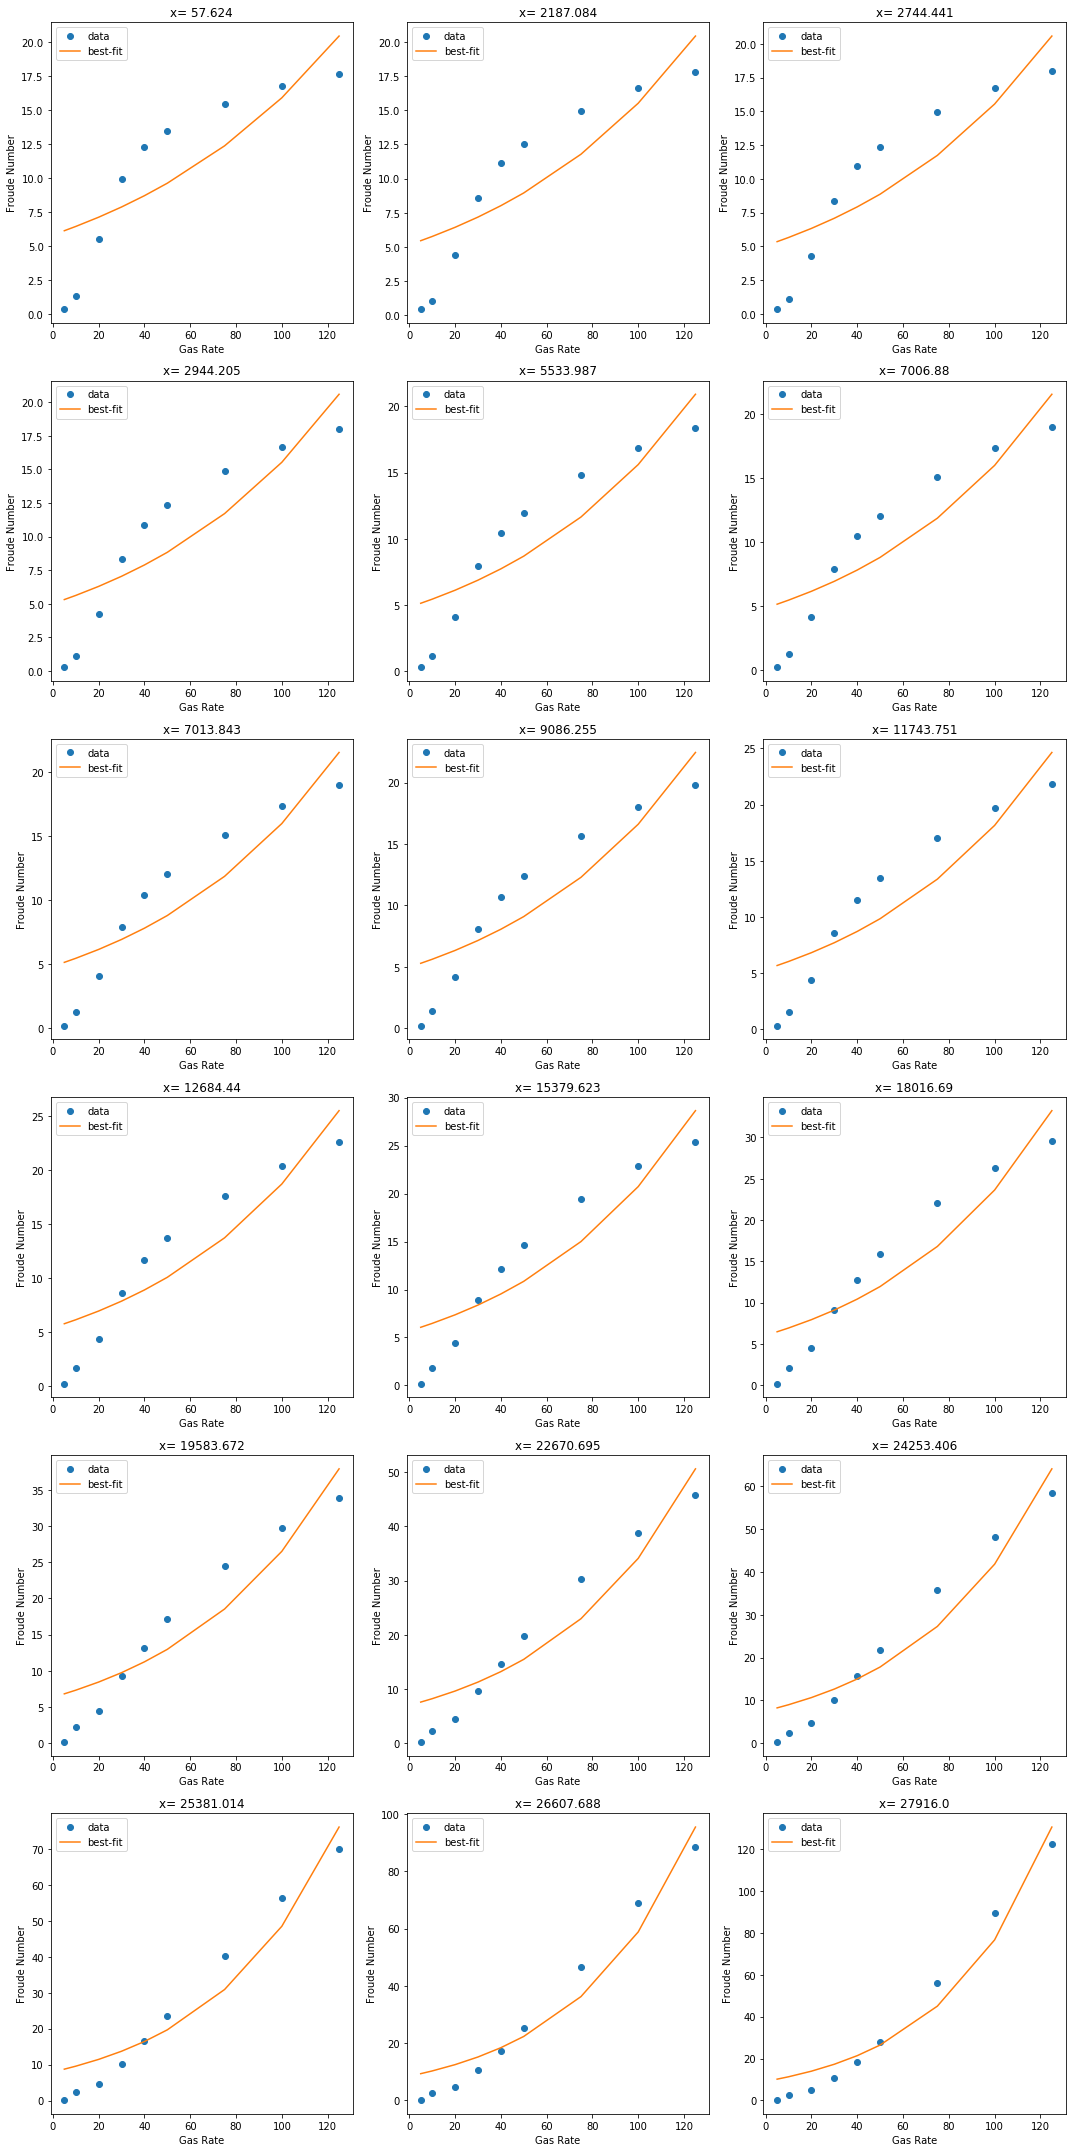

****
Residual plots:
****


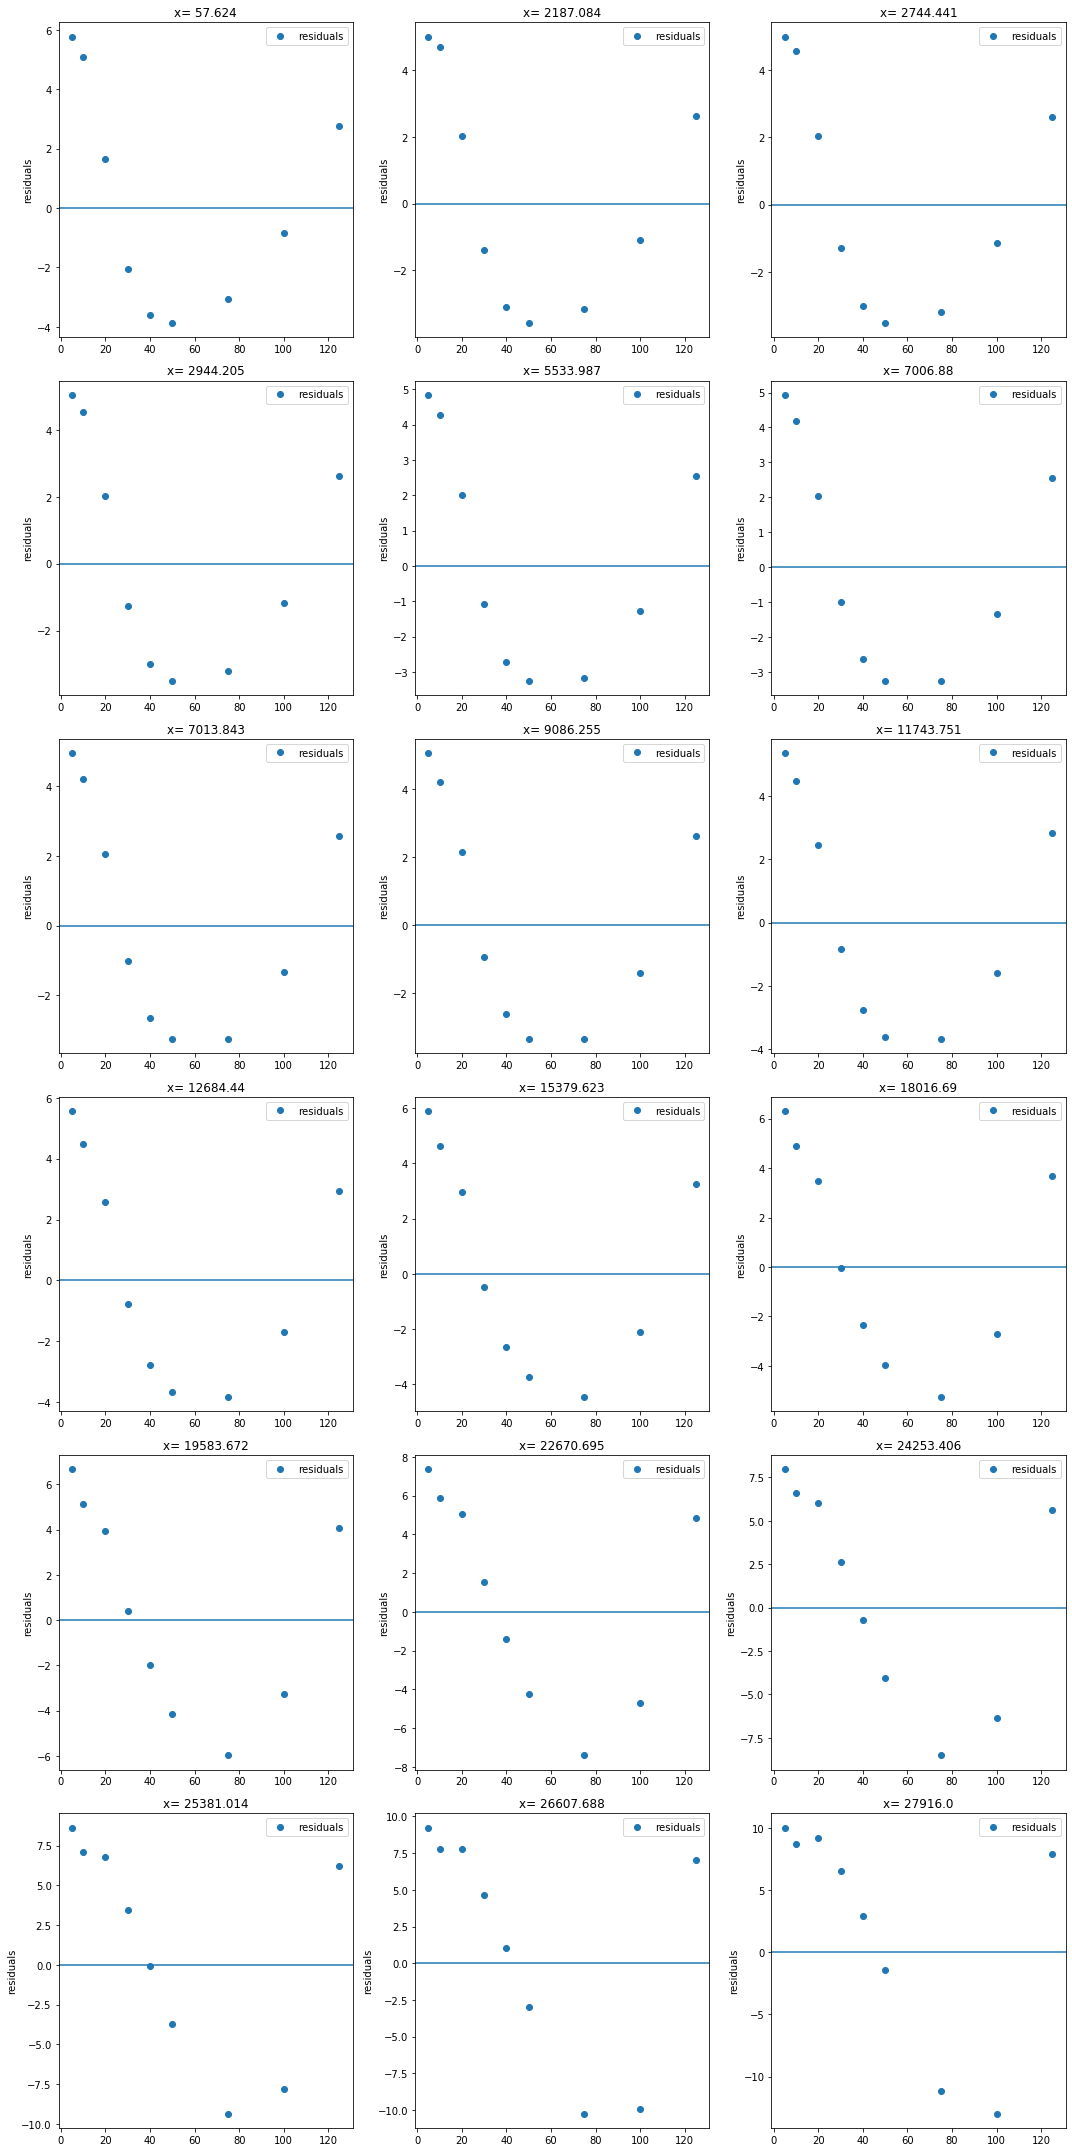

SSE:  384.4842712678626


In [36]:
fit_model(ExponentialModel(),6,3,df_froude,x,'Froude Number',15)

There is a strong pattern in the residual plots, suggesting that this is an unsuitable function for the fit.

## Power-law fitting


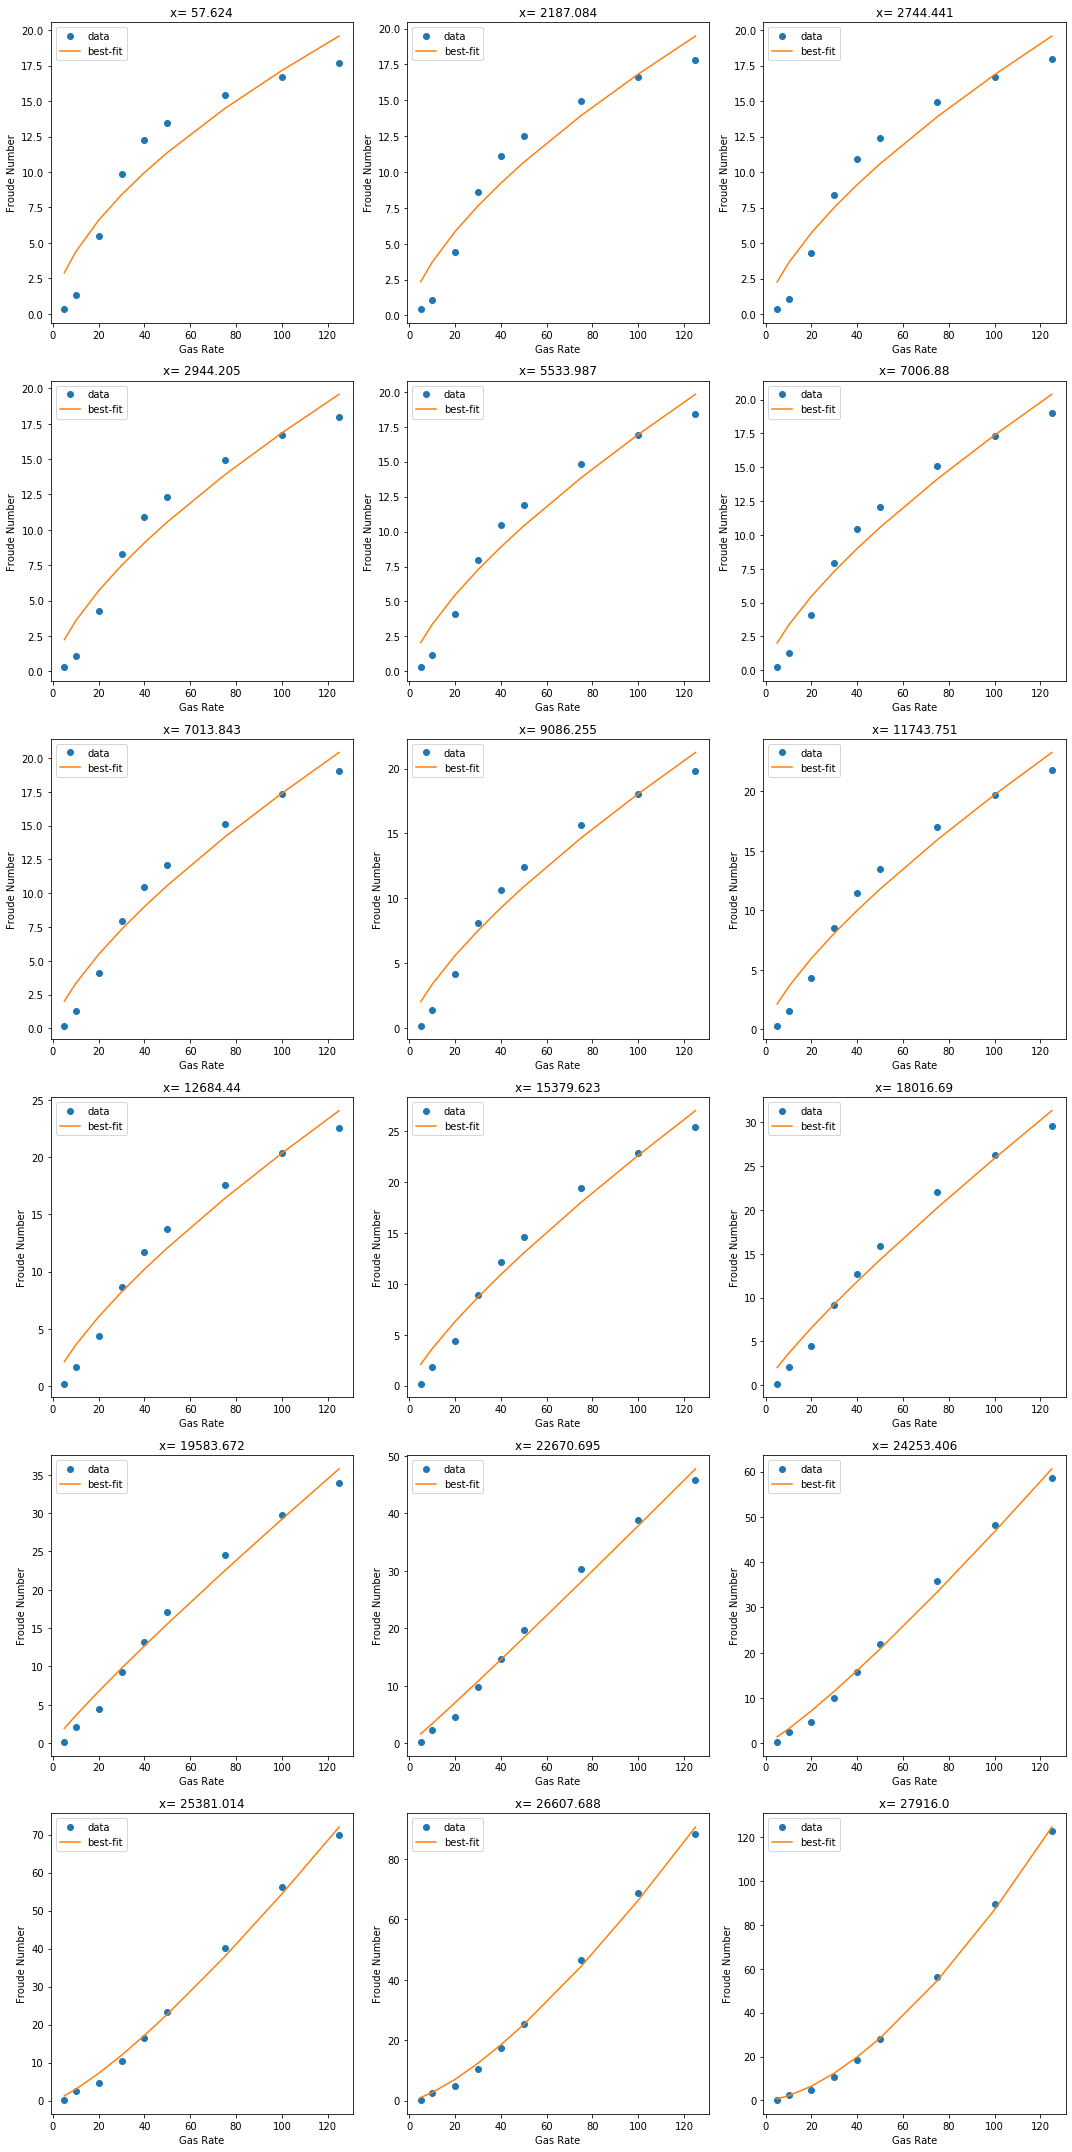

****
Residual plots:
****


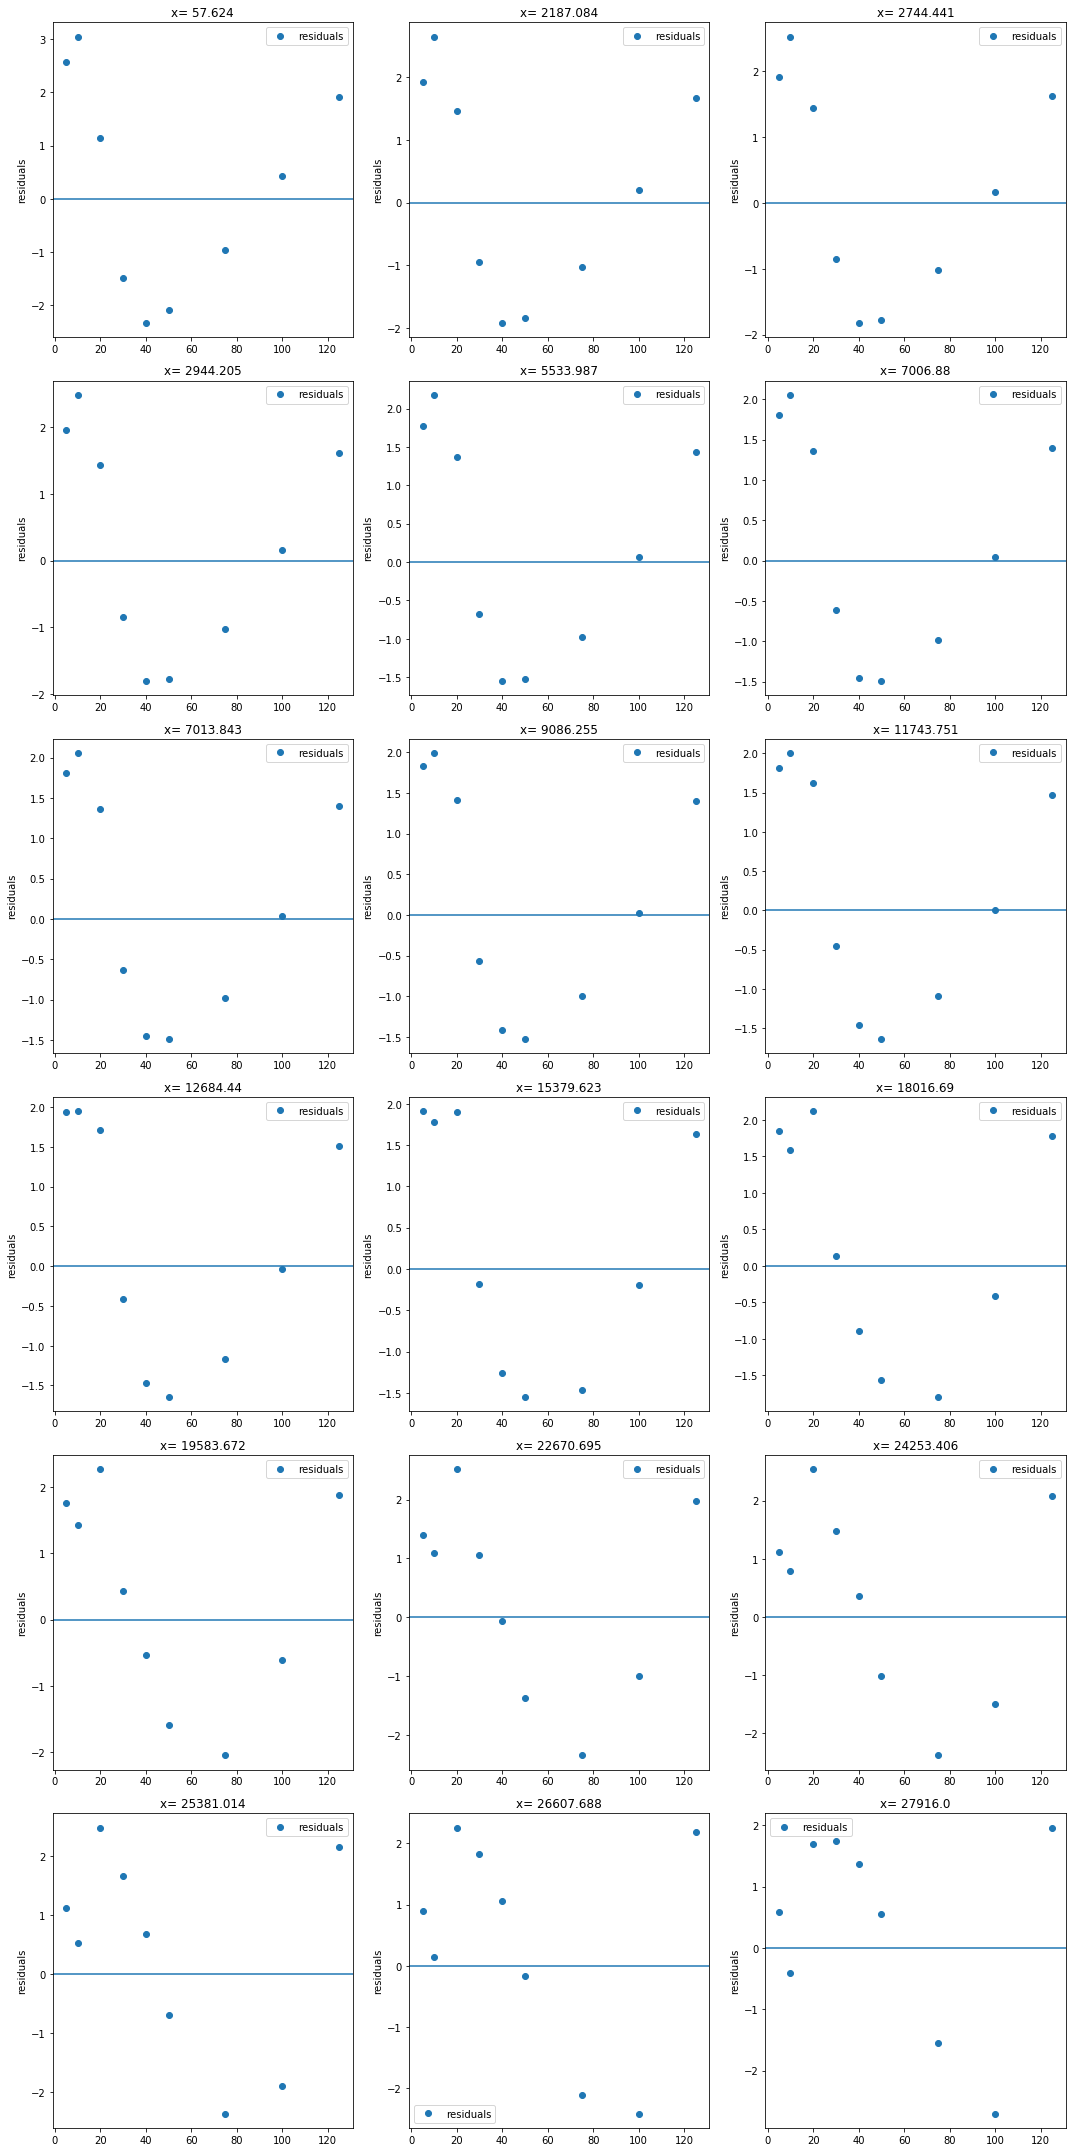

SSE:  43.44131228571991


In [37]:
fit_model(PowerLawModel(),6,3,df_froude,x,'Froude Number',15)

This is also an inappropriate function for fit, as the patterns in the residual plot appear to be non-random

## Logistic function fitting



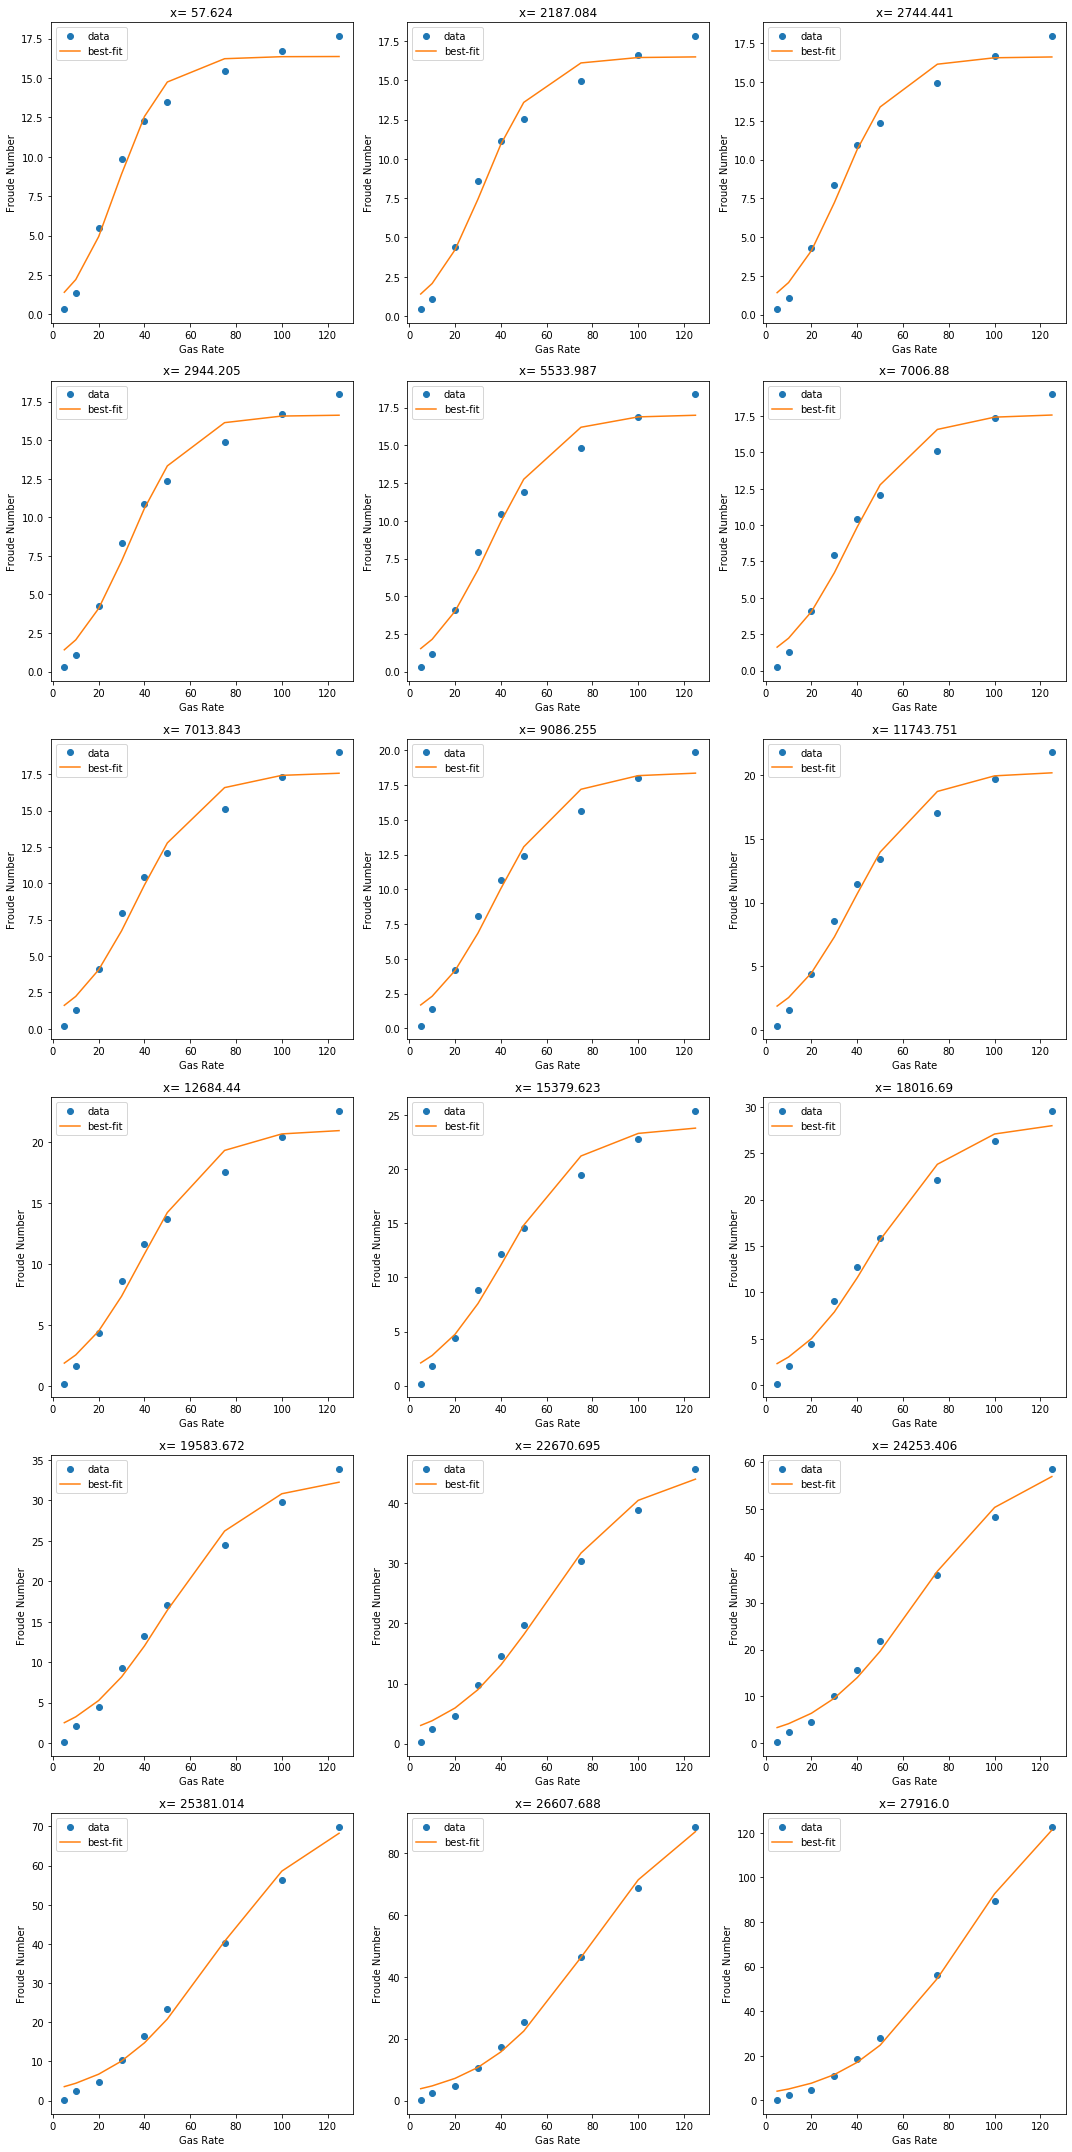

****
Residual plots:
****


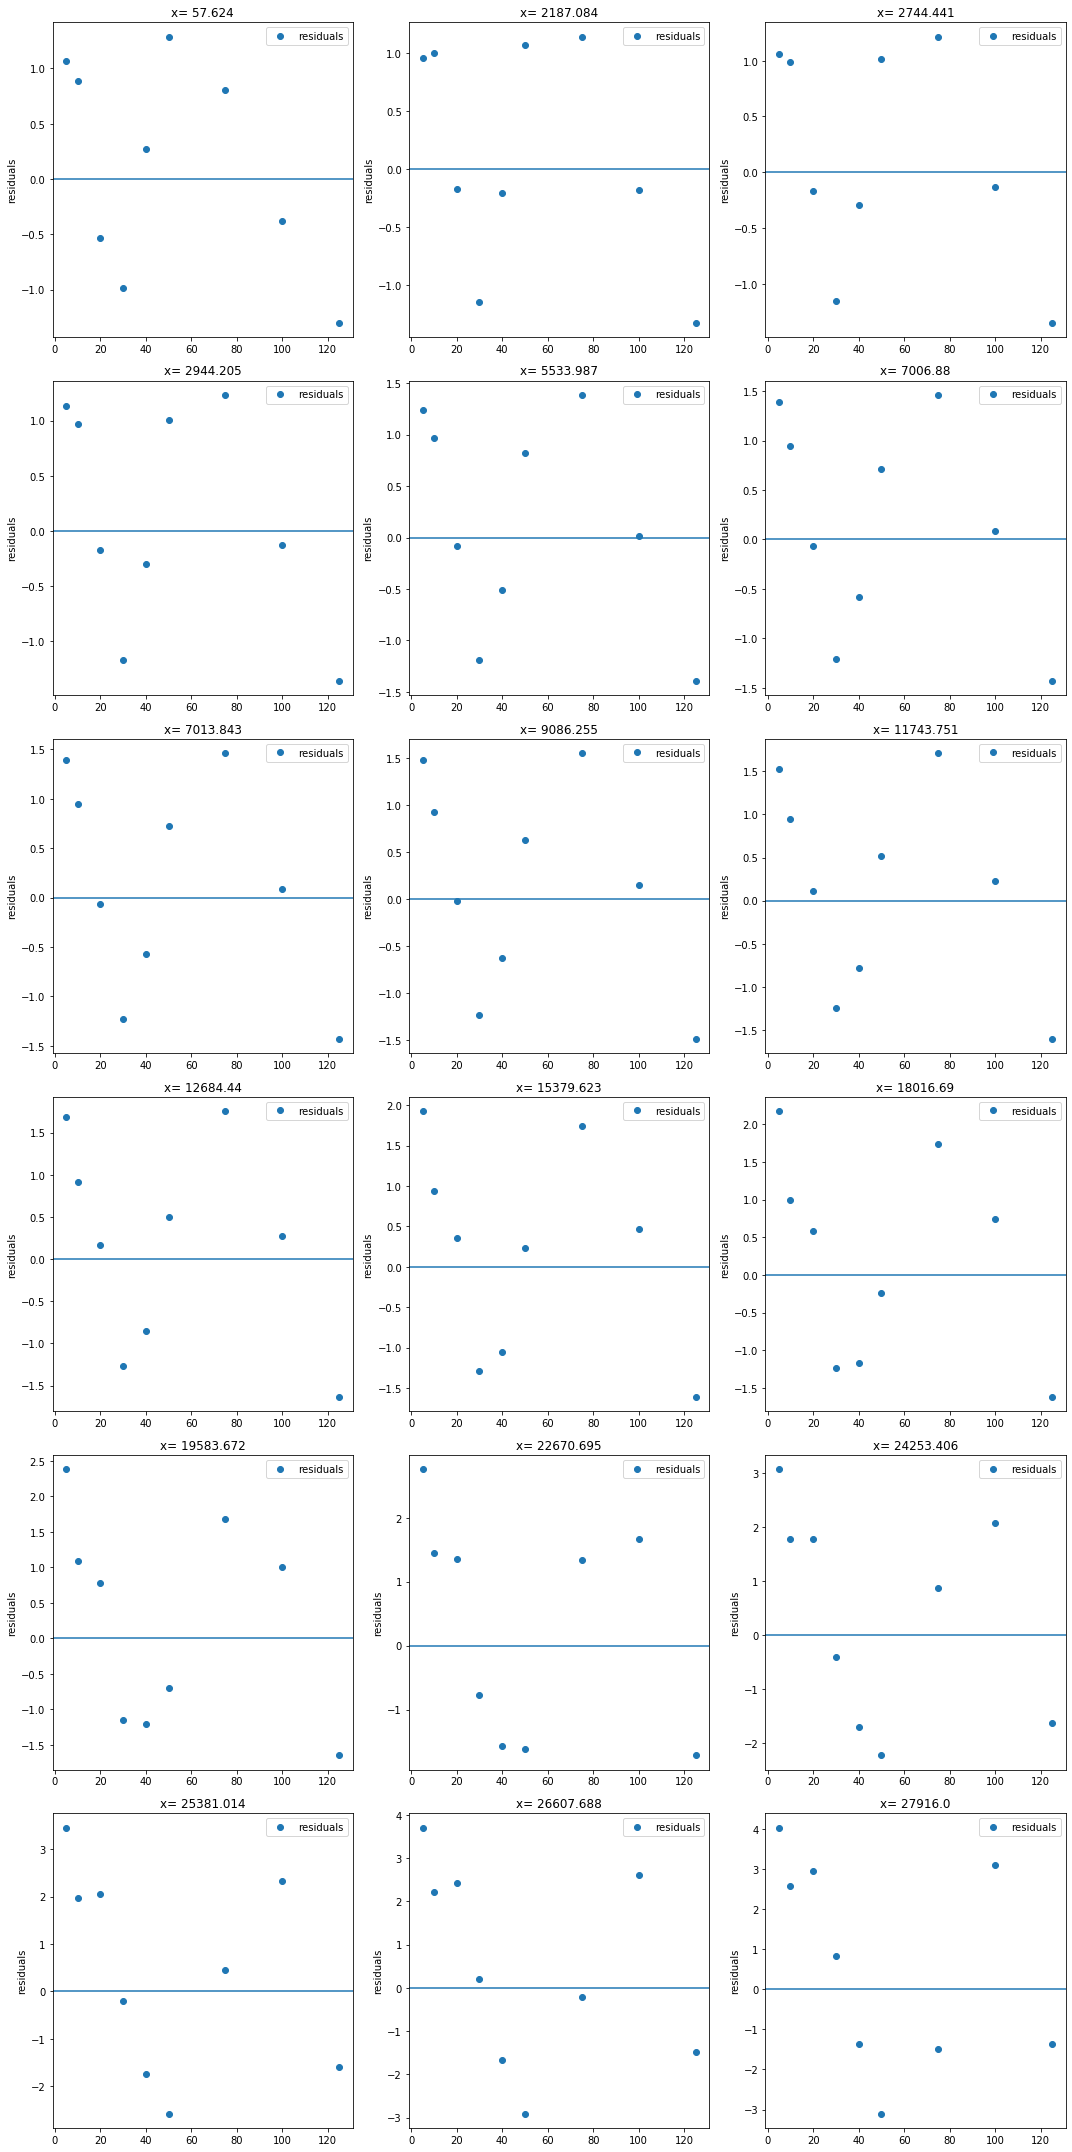

SSE:  37.07003606483948


In [38]:
fit_model(StepModel(form='logistic'),6,3,df_froude,x,'Froude Number',15)

This function was fitted on the basis that the data appeared to follow a sigmoid trend. The residuals appear fairly randomly dispersed. The SSE is higher than the the high order polynomial fit. At some locations the fit is better than others.